### Implementation: Writer Identification using GMM-UBM supervectors

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import preprocessing
import scipy.spatial.distance as spdistance
import os
from sklearn import mixture
import math
import copy
import gzip
import pickle

In [2]:
### First step is to extract the features using ROOT_SIFT
class FeatureEx():
    
    def __init__(self):
        self.sift = cv2.xfeatures2d.SIFT_create()
        
    def extract(self, img):
        keypoints, img_features = self.sift.detectAndCompute(img, None)
        return keypoints, img_features
    
    #### For computing ROOT_SIFT feature
    def compute(self, img):
        img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        if img is None:
            return "No image"
        
        kpts, descriptors = self.extract(img)
        
        ## Hellinger normalization
        descriptors += np.finfo(np.float32).eps
        descriptors /= np.sum(descriptors, axis=1)[:, np.newaxis]
        descriptors = np.sqrt(descriptors)
        
        return (kpts, descriptors)
        

In [ ]:
#### Testing the class FeatureEx
if __name__ == '__main__':
    fEx = FeatureEx()
    kpts1, des1 = fEx.compute('../icdar2013_benchmarking_dataset/001_1.tif')
    kpts2, des2 = fEx.compute('../icdar2013_benchmarking_dataset/001_2.tif')
    features = np.asarray(())
    features = des1
    print(features.shape)
    features = np.vstack((features, des2))
    print (features.shape)

In [3]:
def get_feature_matrix(path, max_desc=150000, max_desc_per_file=150):
    'path denotes the path to the image files'
    fEx = FeatureEx() #creating Feature extraction object
    
    directory = path
    
    # features is a matrix of features(row-wise)
    features = np.asarray(())
    
    for file in os.listdir(directory):
        print (file)
        if file.endswith(".tif"): 
            print(os.path.join(directory, file))
            filePath = os.path.join(directory, file)
            
            kpts, descriptors = fEx.compute(filePath)
            if descriptors.shape[0] > max_desc_per_file:
                'select the random max_desc_per_file from the descriptors'
                idx = np.random.randint(descriptors.shape[0], size=max_desc_per_file)
                descriptors = descriptors[idx, :]
                
            if features.size == 0:
                features = descriptors
            else:
                if features.shape[0] + descriptors.shape[0] <= max_desc:
                    features = np.vstack((features, descriptors))
                else:
                    break
        else:
            continue
    
    return features


In [4]:
def compute_gmm_params(features):
    'features is a matrix of features(row-wise) to train gmm model'
    
    ## using default number of clusters = 100 as is used in paper
    gmm = mixture.GaussianMixture(n_components=100, covariance_type='diag')
    gmm.fit(features)
    
    return gmm

In [6]:
# Let max_desc = 150000 for training ubm
# And max_desc_per_file = max_desc/no_of_files = 150000/1000 in this case
features = get_feature_matrix('../icdar2013_benchmarking_dataset/')
gmm = compute_gmm_params(features)

007_4.tif
../icdar2013_benchmarking_dataset/007_4.tif
123_3.tif
../icdar2013_benchmarking_dataset/123_3.tif
041_3.tif
../icdar2013_benchmarking_dataset/041_3.tif
005_2.tif
../icdar2013_benchmarking_dataset/005_2.tif
086_3.tif
../icdar2013_benchmarking_dataset/086_3.tif
213_3.tif
../icdar2013_benchmarking_dataset/213_3.tif
095_2.tif
../icdar2013_benchmarking_dataset/095_2.tif
159_4.tif
../icdar2013_benchmarking_dataset/159_4.tif
153_1.tif
../icdar2013_benchmarking_dataset/153_1.tif
081_4.tif
../icdar2013_benchmarking_dataset/081_4.tif
216_2.tif
../icdar2013_benchmarking_dataset/216_2.tif
081_3.tif
../icdar2013_benchmarking_dataset/081_3.tif
214_2.tif
../icdar2013_benchmarking_dataset/214_2.tif
156_2.tif
../icdar2013_benchmarking_dataset/156_2.tif
245_2.tif
../icdar2013_benchmarking_dataset/245_2.tif
246_1.tif
../icdar2013_benchmarking_dataset/246_1.tif
020_2.tif
../icdar2013_benchmarking_dataset/020_2.tif
194_4.tif
../icdar2013_benchmarking_dataset/194_4.tif
201_3.tif
../icdar2013_bench

011_3.tif
../icdar2013_benchmarking_dataset/011_3.tif
146_4.tif
../icdar2013_benchmarking_dataset/146_4.tif
056_4.tif
../icdar2013_benchmarking_dataset/056_4.tif
238_2.tif
../icdar2013_benchmarking_dataset/238_2.tif
047_4.tif
../icdar2013_benchmarking_dataset/047_4.tif
002_1.tif
../icdar2013_benchmarking_dataset/002_1.tif
016_2.tif
../icdar2013_benchmarking_dataset/016_2.tif
029_3.tif
../icdar2013_benchmarking_dataset/029_3.tif
039_4.tif
../icdar2013_benchmarking_dataset/039_4.tif
011_2.tif
../icdar2013_benchmarking_dataset/011_2.tif
222_1.tif
../icdar2013_benchmarking_dataset/222_1.tif
205_2.tif
../icdar2013_benchmarking_dataset/205_2.tif
167_3.tif
../icdar2013_benchmarking_dataset/167_3.tif
161_1.tif
../icdar2013_benchmarking_dataset/161_1.tif
225_3.tif
../icdar2013_benchmarking_dataset/225_3.tif
055_4.tif
../icdar2013_benchmarking_dataset/055_4.tif
087_3.tif
../icdar2013_benchmarking_dataset/087_3.tif
143_4.tif
../icdar2013_benchmarking_dataset/143_4.tif
248_4.tif
../icdar2013_bench

045_1.tif
../icdar2013_benchmarking_dataset/045_1.tif
023_2.tif
../icdar2013_benchmarking_dataset/023_2.tif
027_1.tif
../icdar2013_benchmarking_dataset/027_1.tif
146_3.tif
../icdar2013_benchmarking_dataset/146_3.tif
121_1.tif
../icdar2013_benchmarking_dataset/121_1.tif
001_4.tif
../icdar2013_benchmarking_dataset/001_4.tif
249_1.tif
../icdar2013_benchmarking_dataset/249_1.tif
075_3.tif
../icdar2013_benchmarking_dataset/075_3.tif
068_3.tif
../icdar2013_benchmarking_dataset/068_3.tif
196_2.tif
../icdar2013_benchmarking_dataset/196_2.tif
101_1.tif
../icdar2013_benchmarking_dataset/101_1.tif
176_3.tif
../icdar2013_benchmarking_dataset/176_3.tif
086_1.tif
../icdar2013_benchmarking_dataset/086_1.tif
180_3.tif
../icdar2013_benchmarking_dataset/180_3.tif
188_4.tif
../icdar2013_benchmarking_dataset/188_4.tif
061_4.tif
../icdar2013_benchmarking_dataset/061_4.tif
022_2.tif
../icdar2013_benchmarking_dataset/022_2.tif
001_3.tif
../icdar2013_benchmarking_dataset/001_3.tif
070_1.tif
../icdar2013_bench

105_2.tif
../icdar2013_benchmarking_dataset/105_2.tif
067_1.tif
../icdar2013_benchmarking_dataset/067_1.tif
052_4.tif
../icdar2013_benchmarking_dataset/052_4.tif
101_3.tif
../icdar2013_benchmarking_dataset/101_3.tif
113_3.tif
../icdar2013_benchmarking_dataset/113_3.tif
129_1.tif
../icdar2013_benchmarking_dataset/129_1.tif
155_4.tif
../icdar2013_benchmarking_dataset/155_4.tif
169_4.tif
../icdar2013_benchmarking_dataset/169_4.tif
150_3.tif
../icdar2013_benchmarking_dataset/150_3.tif
069_1.tif
../icdar2013_benchmarking_dataset/069_1.tif
175_2.tif
../icdar2013_benchmarking_dataset/175_2.tif
211_4.tif
../icdar2013_benchmarking_dataset/211_4.tif
241_4.tif
../icdar2013_benchmarking_dataset/241_4.tif
154_3.tif
../icdar2013_benchmarking_dataset/154_3.tif
053_2.tif
../icdar2013_benchmarking_dataset/053_2.tif
100_2.tif
../icdar2013_benchmarking_dataset/100_2.tif
009_3.tif
../icdar2013_benchmarking_dataset/009_3.tif
141_2.tif
../icdar2013_benchmarking_dataset/141_2.tif
088_3.tif
../icdar2013_bench

106_4.tif
../icdar2013_benchmarking_dataset/106_4.tif
083_4.tif
../icdar2013_benchmarking_dataset/083_4.tif
035_4.tif
../icdar2013_benchmarking_dataset/035_4.tif
058_4.tif
../icdar2013_benchmarking_dataset/058_4.tif
010_2.tif
../icdar2013_benchmarking_dataset/010_2.tif
075_2.tif
../icdar2013_benchmarking_dataset/075_2.tif
141_3.tif
../icdar2013_benchmarking_dataset/141_3.tif
127_3.tif
../icdar2013_benchmarking_dataset/127_3.tif
065_1.tif
../icdar2013_benchmarking_dataset/065_1.tif
051_3.tif
../icdar2013_benchmarking_dataset/051_3.tif
015_1.tif
../icdar2013_benchmarking_dataset/015_1.tif
116_4.tif
../icdar2013_benchmarking_dataset/116_4.tif
236_1.tif
../icdar2013_benchmarking_dataset/236_1.tif
040_2.tif
../icdar2013_benchmarking_dataset/040_2.tif
165_4.tif
../icdar2013_benchmarking_dataset/165_4.tif
003_4.tif
../icdar2013_benchmarking_dataset/003_4.tif
104_3.tif
../icdar2013_benchmarking_dataset/104_3.tif
082_1.tif
../icdar2013_benchmarking_dataset/082_1.tif
244_3.tif
../icdar2013_bench

224_1.tif
../icdar2013_benchmarking_dataset/224_1.tif
163_4.tif
../icdar2013_benchmarking_dataset/163_4.tif
085_2.tif
../icdar2013_benchmarking_dataset/085_2.tif
215_2.tif
../icdar2013_benchmarking_dataset/215_2.tif
250_1.tif
../icdar2013_benchmarking_dataset/250_1.tif
003_2.tif
../icdar2013_benchmarking_dataset/003_2.tif
229_1.tif
../icdar2013_benchmarking_dataset/229_1.tif
064_2.tif
../icdar2013_benchmarking_dataset/064_2.tif
048_1.tif
../icdar2013_benchmarking_dataset/048_1.tif
086_2.tif
../icdar2013_benchmarking_dataset/086_2.tif
189_2.tif
../icdar2013_benchmarking_dataset/189_2.tif
120_4.tif
../icdar2013_benchmarking_dataset/120_4.tif
222_3.tif
../icdar2013_benchmarking_dataset/222_3.tif
052_1.tif
../icdar2013_benchmarking_dataset/052_1.tif
159_3.tif
../icdar2013_benchmarking_dataset/159_3.tif
021_2.tif
../icdar2013_benchmarking_dataset/021_2.tif
237_1.tif
../icdar2013_benchmarking_dataset/237_1.tif
010_1.tif
../icdar2013_benchmarking_dataset/010_1.tif
059_2.tif
../icdar2013_bench

082_3.tif
../icdar2013_benchmarking_dataset/082_3.tif
026_4.tif
../icdar2013_benchmarking_dataset/026_4.tif
018_3.tif
../icdar2013_benchmarking_dataset/018_3.tif
041_1.tif
../icdar2013_benchmarking_dataset/041_1.tif
016_4.tif
../icdar2013_benchmarking_dataset/016_4.tif
168_2.tif
../icdar2013_benchmarking_dataset/168_2.tif
041_4.tif
../icdar2013_benchmarking_dataset/041_4.tif
130_1.tif
../icdar2013_benchmarking_dataset/130_1.tif
141_1.tif
../icdar2013_benchmarking_dataset/141_1.tif
092_3.tif
../icdar2013_benchmarking_dataset/092_3.tif
050_1.tif
../icdar2013_benchmarking_dataset/050_1.tif
013_1.tif
../icdar2013_benchmarking_dataset/013_1.tif
044_3.tif
../icdar2013_benchmarking_dataset/044_3.tif
034_2.tif
../icdar2013_benchmarking_dataset/034_2.tif
173_2.tif
../icdar2013_benchmarking_dataset/173_2.tif
104_4.tif
../icdar2013_benchmarking_dataset/104_4.tif
067_3.tif
../icdar2013_benchmarking_dataset/067_3.tif
118_4.tif
../icdar2013_benchmarking_dataset/118_4.tif
205_4.tif
../icdar2013_bench

In [7]:
def adaptMAP(data, gmm, posteriors, relevance = 16, update='wmc'):

    """
    Adapt new data to a given gmm with a specific
    relevance factor.
    Reference: D.A.Reynolds et al. 'Speaker Verification Using Adapted Gaussian
    Mixture Models'
    """

    sum_post = np.sum(posteriors, axis=0) # (N_component x ,)
    
    nd = len(gmm.weights_) # number of components / gaussians
    fd = data.shape[1] # feature dimension

    data_square = data * data

    def loop(i):
        means_ = posteriors[:,i].reshape(1,-1).dot(data)
        covs_ = posteriors[:,i].reshape(1,-1).dot(data_square)
        return means_, covs_

    means, covs = zip( *map(loop, range(nd)))

    means = np.array(means).reshape(nd, fd)
    covs = np.array(covs).reshape(nd,fd)

    # add some small number
    means += np.finfo(float).eps
    covs += np.finfo(float).eps

    # normalize them
    means /= sum_post.reshape(-1,1) + np.finfo(float).eps
    covs /= sum_post.reshape(-1,1) + np.finfo(float).eps

    # now combine the two estimates using the relevance factor
    # i.e. interpolation controlled by relevance factor
    def combine(i):
        alpha = sum_post[i] / (sum_post[i] + relevance)

        # update priors
        if 'w' in update:
            weights_ = ( (alpha * sum_post[i]) / float(len(data)) ) \
                    + ( (1.0 - alpha) * gmm.weights_[i] )
        else:
            weights_ = copy.deepcopy(gmm.weights_[i])
    
        # update means
        if 'm' in update:
            means_ = alpha * means[i] \
                    + ( (1.0 -alpha) * gmm.means_[i] )
        else:
            means_ = copy.deepcopy(gmm.means_[i])
        # update covariance matrix
        if 'c' in update:
            covs_ = alpha * covs[i] \
                    + (1.0 - alpha) * (gmm.covariances_[i] + \
                                       gmm.means_[i] * gmm.means_[i])\
                    - (means_ * means_) # careful, this is means_ not means_[i], 
                                        # since we are in that specific
                                        # component computation already!
        else:
            covs_ = copy.deepcopy(gmm.covariances_[i])

        return weights_, means_, covs_

    weights, means, covs = zip( *map(combine, range(nd)) )

    weights = np.array(weights)
    means = np.array(means)
    covs = np.array(covs)

    # let weights sum to 1
    if 'w' in update:
        weights /= weights.sum() + np.finfo(float).eps

    # create new mixture  
    adapted_gmm = mixture.GaussianMixture(nd)
    # and assign mean, cov, priors to it
    adapted_gmm.weights_ = weights
    adapted_gmm.means_ = means
    adapted_gmm.covariances_ = covs
    # adapted_gmm._set_covariances( covs ) # this variant checks the covariances 

    
    return adapted_gmm

In [8]:
def supervectorStacking(gmm, update='wmc'):
    """
    form supervector, optionally normalize each component
    """
    
    enc = []
    
    if 'm' in update:
        enc_m = gmm.means_
        enc.append(enc_m.reshape(1,-1))

    if 'c' in update:
        enc_c = gmm.covariances_
        enc.append(enc_c.reshape(1,-1))

    if 'w' in update:
        enc_w = gmm.weights_
        enc.append(enc_w.reshape(1,-1))

    enc = np.concatenate(enc, axis=1)
    
    # Normalize enc
    enc = np.sqrt(enc)
    enc = preprocessing.normalize(enc)

    return enc

In [9]:
def supervector(gmm, features, posteriors, relevance=16, update='wmc'):
    'Returns stacked supervector for the particular document'
    'features are the feature matrix of that particular document'
    scribe_gmm = adaptMAP(features, gmm, posteriors, relevance, update)
    
    return supervectorStacking(scribe_gmm, update)

In [10]:
'''
    For adapting to a document W, calculate it's features
    and then using that features compute posteriors
    and then call supervector function to get the supervector corresponding to document W
'''

fEx = FeatureEx()
filePath = '../icdar2013_benchmarking_dataset/001_1.tif'
kpts, data = fEx.compute(filePath)

posteriors = gmm.predict_proba(data)
enc = supervector(gmm, data, posteriors)
print(enc)

[[0.00572797 0.00871033 0.01082185 ... 0.0037791  0.00436174 0.00347353]]


In [24]:
def ubm_adaptation(path, outDir, gmm):
    'path denotes the path to the image files'
    fEx = FeatureEx() # creating Feature extraction object
    
    directory = path
    
    # features is a matrix of features(row-wise)

    for file in os.listdir(directory):
        print (file)
        if file.endswith(".tif"): 
            print(os.path.join(directory, file))
            fp = os.path.join(directory, file)
            print(fp)
            kpts, data = fEx.compute(fp)
            
            posteriors = gmm.predict_proba(data)
            enc = supervector(gmm, data, posteriors)
            print(enc)
            
            #### save the encoding in a folder outDir as pickle file
            fileName, file_ext = os.path.splitext(file)
            
            if not os.path.exists(outDir):
                os.makedirs(outDir)
            
            filepath = os.path.join(outDir, fileName + '.pkl.gz')
            print(filepath)
            with gzip.open(filepath, 'wb') as f:
                print(f)
                pickle.dump(enc, f, -1)
                
        else:
            continue


In [25]:
ubm_adaptation('../experimental_dataset_2013/', '../outTestVoc', gmm)

123_3.tif
../experimental_dataset_2013/123_3.tif
../experimental_dataset_2013/123_3.tif
[[0.00439875 0.00762963 0.01072019 ... 0.00377986 0.00473885 0.0032714 ]]
../outTestVoc/123_3.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/123_3.pkl.gz' 0x7f5d800dbcf8>
041_3.tif
../experimental_dataset_2013/041_3.tif
../experimental_dataset_2013/041_3.tif
[[0.00473437 0.00781227 0.01027514 ... 0.004069   0.00418095 0.00328866]]
../outTestVoc/041_3.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/041_3.pkl.gz' 0x7f5d800db518>
086_3.tif
../experimental_dataset_2013/086_3.tif
../experimental_dataset_2013/086_3.tif
[[0.00440543 0.00780229 0.0103727  ... 0.00354991 0.00333568 0.002772  ]]
../outTestVoc/086_3.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/086_3.pkl.gz' 0x7f5d800dbb70>
095_2.tif
../experimental_dataset_2013/095_2.tif
../experimental_dataset_2013/095_2.tif
[[0.00445864 0.00687138 0.00909987 ... 0.00353626 0.00474938 0.00280139]]
../outTestVoc/095_2.pkl.gz
<gzip _io.BufferedW

[[0.00533114 0.0079821  0.0100067  ... 0.00382227 0.00405498 0.00273682]]
../outTestVoc/114_2.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/114_2.pkl.gz' 0x7f5d800db518>
064_1.tif
../experimental_dataset_2013/064_1.tif
../experimental_dataset_2013/064_1.tif
[[0.0044901  0.0080361  0.01100967 ... 0.00948672 0.00324856 0.00285987]]
../outTestVoc/064_1.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/064_1.pkl.gz' 0x7f5d800dbb70>
090_4.tif
../experimental_dataset_2013/090_4.tif
../experimental_dataset_2013/090_4.tif
[[0.00381641 0.00620786 0.00897193 ... 0.00352968 0.00421419 0.00287691]]
../outTestVoc/090_4.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/090_4.pkl.gz' 0x7f5d800dbc18>
077_2.tif
../experimental_dataset_2013/077_2.tif
../experimental_dataset_2013/077_2.tif
[[0.00499541 0.00834134 0.01026379 ... 0.00353396 0.00346154 0.00293465]]
../outTestVoc/077_2.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/077_2.pkl.gz' 0x7f5d800db978>
027_4.tif
../experimental_datase

[[0.0057414  0.00905846 0.01069884 ... 0.00508257 0.00388162 0.00346785]]
../outTestVoc/126_4.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/126_4.pkl.gz' 0x7f5d800dbc18>
038_1.tif
../experimental_dataset_2013/038_1.tif
../experimental_dataset_2013/038_1.tif
[[0.00618148 0.00911387 0.00970808 ... 0.00379159 0.00367891 0.00288209]]
../outTestVoc/038_1.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/038_1.pkl.gz' 0x7f5d800dba90>
029_2.tif
../experimental_dataset_2013/029_2.tif
../experimental_dataset_2013/029_2.tif
[[0.00537045 0.00812847 0.00914889 ... 0.00369084 0.00341823 0.00321209]]
../outTestVoc/029_2.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/029_2.pkl.gz' 0x7f5d800dbb70>
126_1.tif
../experimental_dataset_2013/126_1.tif
../experimental_dataset_2013/126_1.tif
[[0.00508019 0.00813343 0.01022729 ... 0.00359494 0.00373155 0.00351447]]
../outTestVoc/126_1.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/126_1.pkl.gz' 0x7f5d800dbba8>
090_3.tif
../experimental_datase

[[0.00587407 0.00727291 0.01043027 ... 0.00769411 0.00338381 0.00263679]]
../outTestVoc/053_4.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/053_4.pkl.gz' 0x7f5d800dbb70>
033_1.tif
../experimental_dataset_2013/033_1.tif
../experimental_dataset_2013/033_1.tif
[[0.00580499 0.00836882 0.01028682 ... 0.0038209  0.00433808 0.00363379]]
../outTestVoc/033_1.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/033_1.pkl.gz' 0x7f5d800db128>
101_2.tif
../experimental_dataset_2013/101_2.tif
../experimental_dataset_2013/101_2.tif
[[0.00452261 0.00779382 0.01125148 ... 0.00414506 0.00384927 0.00309858]]
../outTestVoc/101_2.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/101_2.pkl.gz' 0x7f5d800dbba8>
080_2.tif
../experimental_dataset_2013/080_2.tif
../experimental_dataset_2013/080_2.tif
[[0.00529759 0.00840903 0.00955264 ... 0.00624684 0.00407039 0.00267567]]
../outTestVoc/080_2.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/080_2.pkl.gz' 0x7f5d800db978>
106_3.tif
../experimental_datase

[[0.0050563  0.00806794 0.00968969 ... 0.00394105 0.00354667 0.00322701]]
../outTestVoc/066_2.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/066_2.pkl.gz' 0x7f5d800dbb70>
075_1.tif
../experimental_dataset_2013/075_1.tif
../experimental_dataset_2013/075_1.tif
[[0.00538779 0.00902395 0.01038362 ... 0.00416864 0.00323834 0.00267408]]
../outTestVoc/075_1.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/075_1.pkl.gz' 0x7f5d800dbba8>
078_3.tif
../experimental_dataset_2013/078_3.tif
../experimental_dataset_2013/078_3.tif
[[0.00544768 0.00831594 0.0107933  ... 0.00382013 0.00371551 0.00272139]]
../outTestVoc/078_3.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/078_3.pkl.gz' 0x7f5d800dbc18>
089_2.tif
../experimental_dataset_2013/089_2.tif
../experimental_dataset_2013/089_2.tif
[[0.00448066 0.00771924 0.00983557 ... 0.00604575 0.00349242 0.0026955 ]]
../outTestVoc/089_2.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/089_2.pkl.gz' 0x7f5d800dba90>
034_1.tif
../experimental_datase

[[0.00638388 0.00778546 0.00957878 ... 0.00407004 0.00360944 0.00296648]]
../outTestVoc/108_3.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/108_3.pkl.gz' 0x7f5d800dbc18>
085_3.tif
../experimental_dataset_2013/085_3.tif
../experimental_dataset_2013/085_3.tif
[[0.00605985 0.00855037 0.00985474 ... 0.00563431 0.00370868 0.00276523]]
../outTestVoc/085_3.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/085_3.pkl.gz' 0x7f5d800db518>
044_4.tif
../experimental_dataset_2013/044_4.tif
../experimental_dataset_2013/044_4.tif
[[0.00443639 0.00712854 0.01016623 ... 0.00400521 0.00337285 0.0027694 ]]
../outTestVoc/044_4.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/044_4.pkl.gz' 0x7f5d800dba90>
055_2.tif
../experimental_dataset_2013/055_2.tif
../experimental_dataset_2013/055_2.tif
[[0.00651714 0.00930877 0.00957919 ... 0.00559318 0.00345539 0.00361978]]
../outTestVoc/055_2.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/055_2.pkl.gz' 0x7f5d800dbb70>
073_2.tif
../experimental_datase

[[0.00527577 0.00804683 0.00963386 ... 0.00345295 0.00390817 0.00272128]]
../outTestVoc/037_3.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/037_3.pkl.gz' 0x7f5d800dbcf8>
107_1.tif
../experimental_dataset_2013/107_1.tif
../experimental_dataset_2013/107_1.tif
[[0.00605316 0.00939846 0.01103309 ... 0.00358676 0.004235   0.00294437]]
../outTestVoc/107_1.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/107_1.pkl.gz' 0x7f5d800dba90>
077_4.tif
../experimental_dataset_2013/077_4.tif
../experimental_dataset_2013/077_4.tif
[[0.0050191  0.00914747 0.01022741 ... 0.00398244 0.00341234 0.00324639]]
../outTestVoc/077_4.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/077_4.pkl.gz' 0x7f5d861ada90>
039_3.tif
../experimental_dataset_2013/039_3.tif
../experimental_dataset_2013/039_3.tif
[[0.0043887  0.00724695 0.01080302 ... 0.00377511 0.00369932 0.00266009]]
../outTestVoc/039_3.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/039_3.pkl.gz' 0x7f5d800dbb70>
124_4.tif
../experimental_datase

[[0.00441977 0.00754089 0.00982862 ... 0.0039081  0.00421551 0.00282736]]
../outTestVoc/087_4.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/087_4.pkl.gz' 0x7f5d861ada90>
081_2.tif
../experimental_dataset_2013/081_2.tif
../experimental_dataset_2013/081_2.tif
[[0.00544291 0.00816292 0.01059855 ... 0.00366012 0.00449189 0.00273379]]
../outTestVoc/081_2.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/081_2.pkl.gz' 0x7f5d800db978>
055_1.tif
../experimental_dataset_2013/055_1.tif
../experimental_dataset_2013/055_1.tif
[[0.00630363 0.01008072 0.01030967 ... 0.00444081 0.00353242 0.0032656 ]]
../outTestVoc/055_1.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/055_1.pkl.gz' 0x7f5d800dbb70>
043_2.tif
../experimental_dataset_2013/043_2.tif
../experimental_dataset_2013/043_2.tif
[[0.00498064 0.00709409 0.01036808 ... 0.00402465 0.00430728 0.00319297]]
../outTestVoc/043_2.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/043_2.pkl.gz' 0x7f5d861ada90>
040_3.tif
../experimental_datase

[[0.00610548 0.0090835  0.01081073 ... 0.00372221 0.00412517 0.00389115]]
../outTestVoc/051_3.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/051_3.pkl.gz' 0x7f5d800dba90>
116_4.tif
../experimental_dataset_2013/116_4.tif
../experimental_dataset_2013/116_4.tif
[[0.00545032 0.00778463 0.00943469 ... 0.00781537 0.00322443 0.0026212 ]]
../outTestVoc/116_4.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/116_4.pkl.gz' 0x7f5d861ada90>
040_2.tif
../experimental_dataset_2013/040_2.tif
../experimental_dataset_2013/040_2.tif
[[0.00574827 0.00894018 0.01017074 ... 0.00387559 0.00393998 0.00350818]]
../outTestVoc/040_2.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/040_2.pkl.gz' 0x7f5d800dbcf8>
104_3.tif
../experimental_dataset_2013/104_3.tif
../experimental_dataset_2013/104_3.tif
[[0.00498086 0.00774136 0.01064523 ... 0.00357115 0.00417562 0.0027576 ]]
../outTestVoc/104_3.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/104_3.pkl.gz' 0x7f5d800dbba8>
082_1.tif
../experimental_datase

[[0.00471775 0.00759122 0.00990207 ... 0.00372937 0.00506829 0.00273418]]
../outTestVoc/028_4.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/028_4.pkl.gz' 0x7f5d800db978>
123_1.tif
../experimental_dataset_2013/123_1.tif
../experimental_dataset_2013/123_1.tif
[[0.00488643 0.00805914 0.01039403 ... 0.0039186  0.00497166 0.00383473]]
../outTestVoc/123_1.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/123_1.pkl.gz' 0x7f5d800dbcf8>
067_2.tif
../experimental_dataset_2013/067_2.tif
../experimental_dataset_2013/067_2.tif
[[0.00615031 0.00868685 0.00970087 ... 0.00370158 0.00512898 0.00272984]]
../outTestVoc/067_2.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/067_2.pkl.gz' 0x7f5d861ada90>
065_2.tif
../experimental_dataset_2013/065_2.tif
../experimental_dataset_2013/065_2.tif
[[0.00530912 0.00773563 0.0090535  ... 0.00348066 0.00355421 0.00281914]]
../outTestVoc/065_2.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/065_2.pkl.gz' 0x7f5d800dbb70>
117_3.tif
../experimental_datase

[[0.00526627 0.00844373 0.00991892 ... 0.00369179 0.00395355 0.00273798]]
../outTestVoc/059_2.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/059_2.pkl.gz' 0x7f5d861ada90>
037_4.tif
../experimental_dataset_2013/037_4.tif
../experimental_dataset_2013/037_4.tif
[[0.00506695 0.00844266 0.00978954 ... 0.00354274 0.00440672 0.0028884 ]]
../outTestVoc/037_4.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/037_4.pkl.gz' 0x7f5d800dba90>
059_4.tif
../experimental_dataset_2013/059_4.tif
../experimental_dataset_2013/059_4.tif
[[0.00626341 0.00859297 0.00988916 ... 0.0054107  0.00340198 0.00293223]]
../outTestVoc/059_4.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/059_4.pkl.gz' 0x7f5d800db978>
085_1.tif
../experimental_dataset_2013/085_1.tif
../experimental_dataset_2013/085_1.tif
[[0.00585071 0.00813225 0.00992598 ... 0.00369593 0.00418342 0.00299574]]
../outTestVoc/085_1.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/085_1.pkl.gz' 0x7f5d861ada90>
123_2.tif
../experimental_datase

[[0.00563753 0.00849701 0.01056755 ... 0.00402927 0.00570072 0.00297233]]
../outTestVoc/076_3.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/076_3.pkl.gz' 0x7f5d800db978>
076_4.tif
../experimental_dataset_2013/076_4.tif
../experimental_dataset_2013/076_4.tif
[[0.00551278 0.00862954 0.01009784 ... 0.0040804  0.00465181 0.00310114]]
../outTestVoc/076_4.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/076_4.pkl.gz' 0x7f5d861ada90>
120_2.tif
../experimental_dataset_2013/120_2.tif
../experimental_dataset_2013/120_2.tif
[[0.00622958 0.00959133 0.01024832 ... 0.00429828 0.00373733 0.00332904]]
../outTestVoc/120_2.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/120_2.pkl.gz' 0x7f5d800dba90>
112_3.tif
../experimental_dataset_2013/112_3.tif
../experimental_dataset_2013/112_3.tif
[[0.00499886 0.00774679 0.01009175 ... 0.00360786 0.00457909 0.00312039]]
../outTestVoc/112_3.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/112_3.pkl.gz' 0x7f5d800dbc18>
028_2.tif
../experimental_datase

[[0.00597674 0.00869802 0.01041912 ... 0.00359697 0.00353184 0.00416162]]
../outTestVoc/033_4.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/033_4.pkl.gz' 0x7f5d800db978>
080_3.tif
../experimental_dataset_2013/080_3.tif
../experimental_dataset_2013/080_3.tif
[[0.00454041 0.00811927 0.01048571 ... 0.00657837 0.00330611 0.00278702]]
../outTestVoc/080_3.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/080_3.pkl.gz' 0x7f5d800dbc18>
115_3.tif
../experimental_dataset_2013/115_3.tif
../experimental_dataset_2013/115_3.tif
[[0.00611111 0.00915655 0.00981254 ... 0.0041859  0.0037882  0.00280524]]
../outTestVoc/115_3.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/115_3.pkl.gz' 0x7f5d861ada90>
114_3.tif
../experimental_dataset_2013/114_3.tif
../experimental_dataset_2013/114_3.tif
[[0.00466109 0.00745827 0.01008053 ... 0.00361378 0.00451393 0.00279776]]
../outTestVoc/114_3.pkl.gz
<gzip _io.BufferedWriter name='../outTestVoc/114_3.pkl.gz' 0x7f5d800db518>
098_1.tif
../experimental_datase

In [16]:
file = '001_1.tif'
fileName, file_ext = os.path.splitext(file)
print(fileName)
# enc = np.array([1, 2, 3])
# enc = enc.reshape(1, 3)
# directory = '../outVoc'
# if not os.path.exists(directory):
#     os.makedirs(directory)
# filePath = '../outVoc/file.pkl.gz'
# with gzip.open(filePath, 'wb') as f:
#     pickle.dump(enc, f, -1)

001_1


In [27]:
ubm_adaptation('../icdar2013_benchmarking_dataset/', '../outTrainVoc', gmm)

007_4.tif
../icdar2013_benchmarking_dataset/007_4.tif
../icdar2013_benchmarking_dataset/007_4.tif
[[0.00587518 0.00866155 0.01122732 ... 0.0035322  0.00428738 0.00297838]]
../outTrainVoc/007_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/007_4.pkl.gz' 0x7f5d800db4e0>
123_3.tif
../icdar2013_benchmarking_dataset/123_3.tif
../icdar2013_benchmarking_dataset/123_3.tif
[[0.00556191 0.0083634  0.01022144 ... 0.00365021 0.00324158 0.00269829]]
../outTrainVoc/123_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/123_3.pkl.gz' 0x7f5d800dbac8>
041_3.tif
../icdar2013_benchmarking_dataset/041_3.tif
../icdar2013_benchmarking_dataset/041_3.tif
[[0.00450674 0.00771394 0.01091981 ... 0.00363101 0.00362315 0.00273473]]
../outTrainVoc/041_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/041_3.pkl.gz' 0x7f5d800dbf60>
005_2.tif
../icdar2013_benchmarking_dataset/005_2.tif
../icdar2013_benchmarking_dataset/005_2.tif
[[0.00579422 0.00913577 0.01067436 ... 0.00347441 0.00361394 0.00413663]]


[[0.00583508 0.00826987 0.010938   ... 0.00352679 0.0036582  0.00439941]]
../outTrainVoc/111_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/111_3.pkl.gz' 0x7f5d800db940>
206_3.tif
../icdar2013_benchmarking_dataset/206_3.tif
../icdar2013_benchmarking_dataset/206_3.tif
[[0.00597421 0.00871666 0.01034221 ... 0.00652552 0.00377901 0.00334469]]
../outTrainVoc/206_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/206_3.pkl.gz' 0x7f5d800db4e0>
189_1.tif
../icdar2013_benchmarking_dataset/189_1.tif
../icdar2013_benchmarking_dataset/189_1.tif
[[0.00584172 0.00742147 0.0102765  ... 0.00396465 0.00381444 0.00371847]]
../outTrainVoc/189_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/189_1.pkl.gz' 0x7f5d800db128>
215_1.tif
../icdar2013_benchmarking_dataset/215_1.tif
../icdar2013_benchmarking_dataset/215_1.tif
[[0.0057114  0.0080785  0.00976417 ... 0.00558575 0.00417473 0.00269242]]
../outTrainVoc/215_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/215_1.pkl.gz' 0x7f5d800d

[[0.00542366 0.00900037 0.01036072 ... 0.00490869 0.00347628 0.00300331]]
../outTrainVoc/176_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/176_4.pkl.gz' 0x7f5d800db3c8>
237_3.tif
../icdar2013_benchmarking_dataset/237_3.tif
../icdar2013_benchmarking_dataset/237_3.tif
[[0.0049548  0.00700488 0.00963312 ... 0.00341369 0.003866   0.00378411]]
../outTrainVoc/237_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/237_3.pkl.gz' 0x7f5d800db4e0>
190_4.tif
../icdar2013_benchmarking_dataset/190_4.tif
../icdar2013_benchmarking_dataset/190_4.tif
[[0.0059224  0.0079912  0.00990942 ... 0.00479388 0.00324267 0.00263671]]
../outTrainVoc/190_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/190_4.pkl.gz' 0x7f5d800dbf60>
046_2.tif
../icdar2013_benchmarking_dataset/046_2.tif
../icdar2013_benchmarking_dataset/046_2.tif
[[0.00466069 0.00859542 0.01080936 ... 0.00401424 0.00359305 0.00370839]]
../outTrainVoc/046_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/046_2.pkl.gz' 0x7f5d800d

[[0.00591843 0.00870465 0.00969774 ... 0.00397617 0.00484748 0.00287306]]
../outTrainVoc/119_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/119_2.pkl.gz' 0x7f5d800dbf60>
114_2.tif
../icdar2013_benchmarking_dataset/114_2.tif
../icdar2013_benchmarking_dataset/114_2.tif
[[0.00625131 0.00853101 0.00892271 ... 0.00344145 0.00373698 0.00291957]]
../outTrainVoc/114_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/114_2.pkl.gz' 0x7f5d800db3c8>
216_1.tif
../icdar2013_benchmarking_dataset/216_1.tif
../icdar2013_benchmarking_dataset/216_1.tif
[[0.0056125  0.00785478 0.01001115 ... 0.00356544 0.0050544  0.00396695]]
../outTrainVoc/216_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/216_1.pkl.gz' 0x7f5d800db9b0>
064_1.tif
../icdar2013_benchmarking_dataset/064_1.tif
../icdar2013_benchmarking_dataset/064_1.tif
[[0.00622337 0.00768856 0.00969947 ... 0.00762312 0.00317584 0.00298177]]
../outTrainVoc/064_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/064_1.pkl.gz' 0x7f5d800d

[[0.00622439 0.00828862 0.00910297 ... 0.00362246 0.00367662 0.00418592]]
../outTrainVoc/169_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/169_2.pkl.gz' 0x7f5d800dbf60>
135_1.tif
../icdar2013_benchmarking_dataset/135_1.tif
../icdar2013_benchmarking_dataset/135_1.tif
[[0.00494512 0.00771999 0.01013837 ... 0.00390906 0.00367729 0.00266294]]
../outTrainVoc/135_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/135_1.pkl.gz' 0x7f5d800db518>
149_2.tif
../icdar2013_benchmarking_dataset/149_2.tif
../icdar2013_benchmarking_dataset/149_2.tif
[[0.00654629 0.00931888 0.01037842 ... 0.00431203 0.00349024 0.00355533]]
../outTrainVoc/149_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/149_2.pkl.gz' 0x7f5d800db3c8>
007_2.tif
../icdar2013_benchmarking_dataset/007_2.tif
../icdar2013_benchmarking_dataset/007_2.tif
[[0.00592246 0.00860226 0.00972671 ... 0.00360664 0.00477467 0.00273963]]
../outTrainVoc/007_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/007_2.pkl.gz' 0x7f5d800d

[[0.00446322 0.00741663 0.01072371 ... 0.00351975 0.00464244 0.00265477]]
../outTrainVoc/006_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/006_3.pkl.gz' 0x7f5d800db518>
217_3.tif
../icdar2013_benchmarking_dataset/217_3.tif
../icdar2013_benchmarking_dataset/217_3.tif
[[0.00533156 0.00836437 0.010058   ... 0.00370264 0.00399296 0.00269201]]
../outTrainVoc/217_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/217_3.pkl.gz' 0x7f5d800dbac8>
011_3.tif
../icdar2013_benchmarking_dataset/011_3.tif
../icdar2013_benchmarking_dataset/011_3.tif
[[0.00530104 0.00746747 0.01035604 ... 0.0062441  0.0033963  0.00257581]]
../outTrainVoc/011_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/011_3.pkl.gz' 0x7f5d800db4e0>
146_4.tif
../icdar2013_benchmarking_dataset/146_4.tif
../icdar2013_benchmarking_dataset/146_4.tif
[[0.00494869 0.006706   0.00918748 ... 0.00397972 0.00316697 0.00257894]]
../outTrainVoc/146_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/146_4.pkl.gz' 0x7f5d800d

[[0.00680121 0.00970015 0.01006526 ... 0.00525092 0.00338498 0.00291449]]
../outTrainVoc/116_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/116_3.pkl.gz' 0x7f5d800db518>
096_2.tif
../icdar2013_benchmarking_dataset/096_2.tif
../icdar2013_benchmarking_dataset/096_2.tif
[[0.00594532 0.00901785 0.01018808 ... 0.00401405 0.00384225 0.00298603]]
../outTrainVoc/096_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/096_2.pkl.gz' 0x7f5d800db128>
246_3.tif
../icdar2013_benchmarking_dataset/246_3.tif
../icdar2013_benchmarking_dataset/246_3.tif
[[0.00529843 0.00843377 0.01121712 ... 0.0036119  0.00389311 0.00380926]]
../outTrainVoc/246_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/246_3.pkl.gz' 0x7f5d800dbf60>
235_3.tif
../icdar2013_benchmarking_dataset/235_3.tif
../icdar2013_benchmarking_dataset/235_3.tif
[[0.00555925 0.00822315 0.01073876 ... 0.00375646 0.00389378 0.00302059]]
../outTrainVoc/235_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/235_3.pkl.gz' 0x7f5d800d

[[0.00623415 0.00854971 0.01017563 ... 0.00529808 0.00352723 0.0034603 ]]
../outTrainVoc/120_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/120_1.pkl.gz' 0x7f5d800db4e0>
117_1.tif
../icdar2013_benchmarking_dataset/117_1.tif
../icdar2013_benchmarking_dataset/117_1.tif
[[0.00586882 0.00959792 0.0114473  ... 0.00445345 0.00377144 0.0027199 ]]
../outTrainVoc/117_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/117_1.pkl.gz' 0x7f5d800db9b0>
111_4.tif
../icdar2013_benchmarking_dataset/111_4.tif
../icdar2013_benchmarking_dataset/111_4.tif
[[0.00539432 0.0080646  0.00983182 ... 0.00341595 0.0040118  0.00407196]]
../outTrainVoc/111_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/111_4.pkl.gz' 0x7f5d800db3c8>
250_3.tif
../icdar2013_benchmarking_dataset/250_3.tif
../icdar2013_benchmarking_dataset/250_3.tif
[[0.00408939 0.00737829 0.01049129 ... 0.00364405 0.00480929 0.00267736]]
../outTrainVoc/250_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/250_3.pkl.gz' 0x7f5d800d

[[0.00481393 0.00798911 0.01026521 ... 0.00347246 0.00448083 0.00287966]]
../outTrainVoc/209_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/209_4.pkl.gz' 0x7f5d800db518>
103_2.tif
../icdar2013_benchmarking_dataset/103_2.tif
../icdar2013_benchmarking_dataset/103_2.tif
[[0.00669992 0.00888689 0.0100427  ... 0.00379687 0.00439898 0.00285726]]
../outTrainVoc/103_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/103_2.pkl.gz' 0x7f5d800db9b0>
009_1.tif
../icdar2013_benchmarking_dataset/009_1.tif
../icdar2013_benchmarking_dataset/009_1.tif
[[0.00401622 0.00683783 0.00975188 ... 0.00404659 0.00458642 0.00443976]]
../outTrainVoc/009_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/009_1.pkl.gz' 0x7f5d800dbac8>
239_2.tif
../icdar2013_benchmarking_dataset/239_2.tif
../icdar2013_benchmarking_dataset/239_2.tif
[[0.00489652 0.00846334 0.01066429 ... 0.00461237 0.00395255 0.00284025]]
../outTrainVoc/239_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/239_2.pkl.gz' 0x7f5d800d

[[0.00583877 0.00792145 0.00999543 ... 0.00413938 0.00355493 0.00258577]]
../outTrainVoc/230_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/230_2.pkl.gz' 0x7f5d800dbac8>
227_2.tif
../icdar2013_benchmarking_dataset/227_2.tif
../icdar2013_benchmarking_dataset/227_2.tif
[[0.00635445 0.00885134 0.00989635 ... 0.0037236  0.00403184 0.00331554]]
../outTrainVoc/227_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/227_2.pkl.gz' 0x7f5d800dbf60>
109_1.tif
../icdar2013_benchmarking_dataset/109_1.tif
../icdar2013_benchmarking_dataset/109_1.tif
[[0.00443092 0.00700931 0.01076524 ... 0.00381299 0.00410645 0.00306135]]
../outTrainVoc/109_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/109_1.pkl.gz' 0x7f5d800db3c8>
202_3.tif
../icdar2013_benchmarking_dataset/202_3.tif
../icdar2013_benchmarking_dataset/202_3.tif
[[0.00672861 0.0085056  0.01043578 ... 0.00587313 0.00355565 0.00260786]]
../outTrainVoc/202_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/202_3.pkl.gz' 0x7f5d800d

[[0.00594351 0.00816162 0.00991864 ... 0.00515322 0.00357583 0.00351657]]
../outTrainVoc/182_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/182_1.pkl.gz' 0x7f5d800dbac8>
161_3.tif
../icdar2013_benchmarking_dataset/161_3.tif
../icdar2013_benchmarking_dataset/161_3.tif
[[0.00391016 0.00749785 0.0104692  ... 0.00367165 0.00374899 0.00279251]]
../outTrainVoc/161_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/161_3.pkl.gz' 0x7f5d800db4e0>
187_3.tif
../icdar2013_benchmarking_dataset/187_3.tif
../icdar2013_benchmarking_dataset/187_3.tif
[[0.00454183 0.0070183  0.01001823 ... 0.00368715 0.00320666 0.00260336]]
../outTrainVoc/187_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/187_3.pkl.gz' 0x7f5d800db518>
100_3.tif
../icdar2013_benchmarking_dataset/100_3.tif
../icdar2013_benchmarking_dataset/100_3.tif
[[0.00442018 0.00678432 0.01006403 ... 0.00336165 0.00371329 0.00259697]]
../outTrainVoc/100_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/100_3.pkl.gz' 0x7f5d800d

[[0.00456744 0.00809711 0.01088895 ... 0.00377098 0.00464737 0.00267687]]
../outTrainVoc/066_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/066_2.pkl.gz' 0x7f5d800dbf60>
075_1.tif
../icdar2013_benchmarking_dataset/075_1.tif
../icdar2013_benchmarking_dataset/075_1.tif
[[0.0039766  0.00672639 0.00995461 ... 0.00445626 0.00337301 0.00266041]]
../outTrainVoc/075_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/075_1.pkl.gz' 0x7f5d800dbac8>
139_1.tif
../icdar2013_benchmarking_dataset/139_1.tif
../icdar2013_benchmarking_dataset/139_1.tif
[[0.00452945 0.00673921 0.00913946 ... 0.00350231 0.00353234 0.00279902]]
../outTrainVoc/139_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/139_1.pkl.gz' 0x7f5d800db128>
015_3.tif
../icdar2013_benchmarking_dataset/015_3.tif
../icdar2013_benchmarking_dataset/015_3.tif
[[0.00413241 0.00768569 0.01175552 ... 0.00398136 0.00437951 0.00326314]]
../outTrainVoc/015_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/015_3.pkl.gz' 0x7f5d800d

[[0.00560359 0.00838462 0.01115022 ... 0.00580949 0.00328185 0.00283431]]
../outTrainVoc/065_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/065_3.pkl.gz' 0x7f5d800dbf60>
168_3.tif
../icdar2013_benchmarking_dataset/168_3.tif
../icdar2013_benchmarking_dataset/168_3.tif
[[0.0060869  0.01059375 0.01136789 ... 0.00550179 0.00318007 0.00361338]]
../outTrainVoc/168_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/168_3.pkl.gz' 0x7f5d800db128>
079_4.tif
../icdar2013_benchmarking_dataset/079_4.tif
../icdar2013_benchmarking_dataset/079_4.tif
[[0.00604169 0.0078327  0.01023503 ... 0.00361382 0.00550144 0.00311641]]
../outTrainVoc/079_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/079_4.pkl.gz' 0x7f5d800db4e0>
135_4.tif
../icdar2013_benchmarking_dataset/135_4.tif
../icdar2013_benchmarking_dataset/135_4.tif
[[0.0043157  0.00737753 0.00938777 ... 0.00390206 0.00401378 0.00261972]]
../outTrainVoc/135_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/135_4.pkl.gz' 0x7f5d800d

[[0.00535783 0.00740585 0.01019031 ... 0.00381124 0.00468654 0.00265831]]
../outTrainVoc/036_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/036_1.pkl.gz' 0x7f5d800db518>
103_4.tif
../icdar2013_benchmarking_dataset/103_4.tif
../icdar2013_benchmarking_dataset/103_4.tif
[[0.00468488 0.00762087 0.01078778 ... 0.0035645  0.00539193 0.00277734]]
../outTrainVoc/103_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/103_4.pkl.gz' 0x7f5d800db128>
110_2.tif
../icdar2013_benchmarking_dataset/110_2.tif
../icdar2013_benchmarking_dataset/110_2.tif
[[0.00470658 0.00819791 0.01033402 ... 0.00358663 0.00337226 0.00306538]]
../outTrainVoc/110_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/110_2.pkl.gz' 0x7f5d800dbac8>
174_3.tif
../icdar2013_benchmarking_dataset/174_3.tif
../icdar2013_benchmarking_dataset/174_3.tif
[[0.00534293 0.0078059  0.00969114 ... 0.00343039 0.004441   0.00278334]]
../outTrainVoc/174_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/174_3.pkl.gz' 0x7f5d800d

[[0.00485447 0.0092648  0.01086582 ... 0.00365996 0.0046204  0.0027376 ]]
../outTrainVoc/092_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/092_1.pkl.gz' 0x7f5d800dbf60>
050_2.tif
../icdar2013_benchmarking_dataset/050_2.tif
../icdar2013_benchmarking_dataset/050_2.tif
[[0.00434333 0.00738333 0.00952368 ... 0.00353123 0.00430887 0.00270364]]
../outTrainVoc/050_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/050_2.pkl.gz' 0x7f5d800db4e0>
240_2.tif
../icdar2013_benchmarking_dataset/240_2.tif
../icdar2013_benchmarking_dataset/240_2.tif
[[0.00526752 0.00779657 0.01046749 ... 0.00409647 0.0038773  0.00299323]]
../outTrainVoc/240_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/240_2.pkl.gz' 0x7f5d800db940>
119_3.tif
../icdar2013_benchmarking_dataset/119_3.tif
../icdar2013_benchmarking_dataset/119_3.tif
[[0.00490357 0.00658276 0.01055214 ... 0.00407496 0.00543906 0.00321676]]
../outTrainVoc/119_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/119_3.pkl.gz' 0x7f5d800d

[[0.00578321 0.00854717 0.01036035 ... 0.00405134 0.00414029 0.00281417]]
../outTrainVoc/136_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/136_1.pkl.gz' 0x7f5d800db4e0>
189_4.tif
../icdar2013_benchmarking_dataset/189_4.tif
../icdar2013_benchmarking_dataset/189_4.tif
[[0.00454112 0.00716501 0.01018839 ... 0.00357229 0.00353685 0.00332336]]
../outTrainVoc/189_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/189_4.pkl.gz' 0x7f5d800db518>
038_3.tif
../icdar2013_benchmarking_dataset/038_3.tif
../icdar2013_benchmarking_dataset/038_3.tif
[[0.00610742 0.00899275 0.01025923 ... 0.00351073 0.00403715 0.00305254]]
../outTrainVoc/038_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/038_3.pkl.gz' 0x7f5d800dbac8>
108_1.tif
../icdar2013_benchmarking_dataset/108_1.tif
../icdar2013_benchmarking_dataset/108_1.tif
[[0.00531399 0.00787311 0.01028576 ... 0.0039652  0.00463905 0.00314029]]
../outTrainVoc/108_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/108_1.pkl.gz' 0x7f5d800d

[[0.0040774  0.00697107 0.01085748 ... 0.00361251 0.00350987 0.00299855]]
../outTrainVoc/107_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/107_1.pkl.gz' 0x7f5d800db518>
178_4.tif
../icdar2013_benchmarking_dataset/178_4.tif
../icdar2013_benchmarking_dataset/178_4.tif
[[0.00546451 0.0095358  0.01024724 ... 0.00778779 0.0030692  0.0028698 ]]
../outTrainVoc/178_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/178_4.pkl.gz' 0x7f5d800dbf60>
077_4.tif
../icdar2013_benchmarking_dataset/077_4.tif
../icdar2013_benchmarking_dataset/077_4.tif
[[0.00544919 0.00957664 0.01046018 ... 0.00607249 0.00391367 0.00285406]]
../outTrainVoc/077_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/077_4.pkl.gz' 0x7f5d800dbac8>
229_4.tif
../icdar2013_benchmarking_dataset/229_4.tif
../icdar2013_benchmarking_dataset/229_4.tif
[[0.00408207 0.00743702 0.01104939 ... 0.00357165 0.00340726 0.00331634]]
../outTrainVoc/229_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/229_4.pkl.gz' 0x7f5d800d

[[0.00557623 0.00803685 0.01003208 ... 0.00382186 0.00324941 0.00265072]]
../outTrainVoc/123_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/123_4.pkl.gz' 0x7f5d800db518>
134_3.tif
../icdar2013_benchmarking_dataset/134_3.tif
../icdar2013_benchmarking_dataset/134_3.tif
[[0.00406041 0.00775956 0.01112676 ... 0.00382565 0.0036848  0.00377341]]
../outTrainVoc/134_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/134_3.pkl.gz' 0x7f5d800db940>
116_2.tif
../icdar2013_benchmarking_dataset/116_2.tif
../icdar2013_benchmarking_dataset/116_2.tif
[[0.00714344 0.01028964 0.01040319 ... 0.00544567 0.00381866 0.00381474]]
../outTrainVoc/116_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/116_2.pkl.gz' 0x7f5d800db4e0>
071_1.tif
../icdar2013_benchmarking_dataset/071_1.tif
../icdar2013_benchmarking_dataset/071_1.tif
[[0.00653859 0.00901552 0.01054484 ... 0.0035714  0.00369808 0.00326077]]
../outTrainVoc/071_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/071_1.pkl.gz' 0x7f5d800d

[[0.00516277 0.0081065  0.009787   ... 0.00527708 0.00345045 0.00330589]]
../outTrainVoc/014_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/014_1.pkl.gz' 0x7f5d800db3c8>
125_2.tif
../icdar2013_benchmarking_dataset/125_2.tif
../icdar2013_benchmarking_dataset/125_2.tif
[[0.00543725 0.00854762 0.0108986  ... 0.00415293 0.00336407 0.00333298]]
../outTrainVoc/125_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/125_2.pkl.gz' 0x7f5d800dbf60>
181_1.tif
../icdar2013_benchmarking_dataset/181_1.tif
../icdar2013_benchmarking_dataset/181_1.tif
[[0.00483414 0.00761467 0.00972128 ... 0.00361198 0.00393856 0.00284334]]
../outTrainVoc/181_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/181_1.pkl.gz' 0x7f5d800dbac8>
219_4.tif
../icdar2013_benchmarking_dataset/219_4.tif
../icdar2013_benchmarking_dataset/219_4.tif
[[0.00415178 0.0080984  0.01098025 ... 0.00352894 0.00349354 0.0033624 ]]
../outTrainVoc/219_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/219_4.pkl.gz' 0x7f5d800d

[[0.00464526 0.00678626 0.0104487  ... 0.00405884 0.00475994 0.00330394]]
../outTrainVoc/186_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/186_2.pkl.gz' 0x7f5d800db940>
097_4.tif
../icdar2013_benchmarking_dataset/097_4.tif
../icdar2013_benchmarking_dataset/097_4.tif
[[0.0051694  0.00751529 0.01076735 ... 0.00381394 0.00422215 0.00270862]]
../outTrainVoc/097_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/097_4.pkl.gz' 0x7f5d800db4e0>
142_4.tif
../icdar2013_benchmarking_dataset/142_4.tif
../icdar2013_benchmarking_dataset/142_4.tif
[[0.00598361 0.00770389 0.0096458  ... 0.00346969 0.00397748 0.00276405]]
../outTrainVoc/142_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/142_4.pkl.gz' 0x7f5d800db128>
183_4.tif
../icdar2013_benchmarking_dataset/183_4.tif
../icdar2013_benchmarking_dataset/183_4.tif
[[0.00447959 0.00823929 0.01060649 ... 0.00594258 0.0037704  0.00273111]]
../outTrainVoc/183_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/183_4.pkl.gz' 0x7f5d800d

[[0.00494955 0.00709684 0.01014665 ... 0.00362496 0.00324974 0.00314829]]
../outTrainVoc/125_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/125_3.pkl.gz' 0x7f5d800db9b0>
020_1.tif
../icdar2013_benchmarking_dataset/020_1.tif
../icdar2013_benchmarking_dataset/020_1.tif
[[0.00515742 0.00776506 0.0097363  ... 0.00401599 0.00398873 0.00275193]]
../outTrainVoc/020_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/020_1.pkl.gz' 0x7f5d800db128>
102_2.tif
../icdar2013_benchmarking_dataset/102_2.tif
../icdar2013_benchmarking_dataset/102_2.tif
[[0.00456792 0.00772472 0.01051382 ... 0.00348412 0.0035398  0.00269733]]
../outTrainVoc/102_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/102_2.pkl.gz' 0x7f5d800db940>
083_1.tif
../icdar2013_benchmarking_dataset/083_1.tif
../icdar2013_benchmarking_dataset/083_1.tif
[[0.00571524 0.008652   0.00994759 ... 0.00369878 0.00351326 0.00290771]]
../outTrainVoc/083_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/083_1.pkl.gz' 0x7f5d800d

[[0.00518381 0.00825541 0.010581   ... 0.00394171 0.00383642 0.00333634]]
../outTrainVoc/109_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/109_2.pkl.gz' 0x7f5d800db4e0>
001_1.tif
../icdar2013_benchmarking_dataset/001_1.tif
../icdar2013_benchmarking_dataset/001_1.tif
[[0.00572797 0.00871033 0.01082185 ... 0.0037791  0.00436174 0.00347353]]
../outTrainVoc/001_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/001_1.pkl.gz' 0x7f5d800db9b0>
233_2.tif
../icdar2013_benchmarking_dataset/233_2.tif
../icdar2013_benchmarking_dataset/233_2.tif
[[0.00615126 0.00880602 0.00971565 ... 0.00359978 0.00448582 0.0031047 ]]
../outTrainVoc/233_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/233_2.pkl.gz' 0x7f5d800dbac8>
190_3.tif
../icdar2013_benchmarking_dataset/190_3.tif
../icdar2013_benchmarking_dataset/190_3.tif
[[0.00525622 0.00927876 0.01018301 ... 0.0037184  0.0032652  0.00265505]]
../outTrainVoc/190_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/190_3.pkl.gz' 0x7f5d800d

[[0.00695224 0.00847972 0.01006764 ... 0.00346745 0.0044765  0.00323952]]
../outTrainVoc/113_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/113_4.pkl.gz' 0x7f5d800dbac8>
108_2.tif
../icdar2013_benchmarking_dataset/108_2.tif
../icdar2013_benchmarking_dataset/108_2.tif
[[0.00658637 0.00841184 0.0088083  ... 0.00412542 0.00373525 0.00363753]]
../outTrainVoc/108_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/108_2.pkl.gz' 0x7f5d800db3c8>
141_4.tif
../icdar2013_benchmarking_dataset/141_4.tif
../icdar2013_benchmarking_dataset/141_4.tif
[[0.00648026 0.00927881 0.00967754 ... 0.0037838  0.00365343 0.0029817 ]]
../outTrainVoc/141_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/141_4.pkl.gz' 0x7f5d800db940>
215_4.tif
../icdar2013_benchmarking_dataset/215_4.tif
../icdar2013_benchmarking_dataset/215_4.tif
[[0.00549849 0.00807134 0.01006475 ... 0.00394562 0.00422813 0.00301944]]
../outTrainVoc/215_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/215_4.pkl.gz' 0x7f5d800d

[[0.00544948 0.00868321 0.01024922 ... 0.0035273  0.00363964 0.00350177]]
../outTrainVoc/024_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/024_3.pkl.gz' 0x7f5d800dbf60>
172_3.tif
../icdar2013_benchmarking_dataset/172_3.tif
../icdar2013_benchmarking_dataset/172_3.tif
[[0.00640749 0.00751486 0.00951314 ... 0.00342781 0.00319854 0.00339789]]
../outTrainVoc/172_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/172_3.pkl.gz' 0x7f5d800db9b0>
012_1.tif
../icdar2013_benchmarking_dataset/012_1.tif
../icdar2013_benchmarking_dataset/012_1.tif
[[0.00541866 0.00758125 0.00962632 ... 0.00354341 0.00371796 0.00346178]]
../outTrainVoc/012_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/012_1.pkl.gz' 0x7f5d800db128>
065_2.tif
../icdar2013_benchmarking_dataset/065_2.tif
../icdar2013_benchmarking_dataset/065_2.tif
[[0.00503557 0.00739839 0.01016189 ... 0.00407261 0.00324646 0.00350432]]
../outTrainVoc/065_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/065_2.pkl.gz' 0x7f5d800d

[[0.00463693 0.00785052 0.01067631 ... 0.00438019 0.00332198 0.00265625]]
../outTrainVoc/139_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/139_3.pkl.gz' 0x7f5d800db9b0>
029_1.tif
../icdar2013_benchmarking_dataset/029_1.tif
../icdar2013_benchmarking_dataset/029_1.tif
[[0.00496988 0.008636   0.01043353 ... 0.00489889 0.00398986 0.00268728]]
../outTrainVoc/029_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/029_1.pkl.gz' 0x7f5d800dbac8>
072_3.tif
../icdar2013_benchmarking_dataset/072_3.tif
../icdar2013_benchmarking_dataset/072_3.tif
[[0.0051215  0.0070995  0.0101823  ... 0.00345327 0.00369526 0.00300518]]
../outTrainVoc/072_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/072_3.pkl.gz' 0x7f5d800db940>
166_3.tif
../icdar2013_benchmarking_dataset/166_3.tif
../icdar2013_benchmarking_dataset/166_3.tif
[[0.00554903 0.00790136 0.00996473 ... 0.00380141 0.00371002 0.00295559]]
../outTrainVoc/166_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/166_3.pkl.gz' 0x7f5d800d

[[0.00614604 0.00838736 0.01054104 ... 0.00345133 0.00397151 0.00344359]]
../outTrainVoc/247_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/247_4.pkl.gz' 0x7f5d800db4e0>
099_2.tif
../icdar2013_benchmarking_dataset/099_2.tif
../icdar2013_benchmarking_dataset/099_2.tif
[[0.00612121 0.00986823 0.00984731 ... 0.00543562 0.00340873 0.00379914]]
../outTrainVoc/099_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/099_2.pkl.gz' 0x7f5d800db940>
155_1.tif
../icdar2013_benchmarking_dataset/155_1.tif
../icdar2013_benchmarking_dataset/155_1.tif
[[0.00662454 0.00785509 0.00952272 ... 0.00794497 0.00312699 0.00259282]]
../outTrainVoc/155_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/155_1.pkl.gz' 0x7f5d800dbf60>
220_1.tif
../icdar2013_benchmarking_dataset/220_1.tif
../icdar2013_benchmarking_dataset/220_1.tif
[[0.00664612 0.00898155 0.00996423 ... 0.00627352 0.00335425 0.00264836]]
../outTrainVoc/220_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/220_1.pkl.gz' 0x7f5d800d

[[0.00491255 0.00810988 0.01018462 ... 0.0037378  0.00488482 0.0027548 ]]
../outTrainVoc/037_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/037_4.pkl.gz' 0x7f5d800db940>
219_3.tif
../icdar2013_benchmarking_dataset/219_3.tif
../icdar2013_benchmarking_dataset/219_3.tif
[[0.00611452 0.00967411 0.01073022 ... 0.00369439 0.00352552 0.00343561]]
../outTrainVoc/219_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/219_3.pkl.gz' 0x7f5d800db3c8>
059_4.tif
../icdar2013_benchmarking_dataset/059_4.tif
../icdar2013_benchmarking_dataset/059_4.tif
[[0.00595408 0.00866069 0.0107244  ... 0.00355084 0.00433845 0.00270795]]
../outTrainVoc/059_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/059_4.pkl.gz' 0x7f5d800db128>
130_3.tif
../icdar2013_benchmarking_dataset/130_3.tif
../icdar2013_benchmarking_dataset/130_3.tif
[[0.00535274 0.00814672 0.0109908  ... 0.00859894 0.00306851 0.00331427]]
../outTrainVoc/130_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/130_3.pkl.gz' 0x7f5d800d

[[0.00526028 0.00859275 0.01103468 ... 0.00356475 0.00496471 0.00339456]]
../outTrainVoc/126_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/126_2.pkl.gz' 0x7f5d800dbac8>
224_3.tif
../icdar2013_benchmarking_dataset/224_3.tif
../icdar2013_benchmarking_dataset/224_3.tif
[[0.00586246 0.00980077 0.01070105 ... 0.0040403  0.00387712 0.00336974]]
../outTrainVoc/224_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/224_3.pkl.gz' 0x7f5d800db4e0>
220_3.tif
../icdar2013_benchmarking_dataset/220_3.tif
../icdar2013_benchmarking_dataset/220_3.tif
[[0.00531089 0.00841695 0.01040756 ... 0.00634064 0.00344605 0.0027225 ]]
../outTrainVoc/220_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/220_3.pkl.gz' 0x7f5d800db128>
024_1.tif
../icdar2013_benchmarking_dataset/024_1.tif
../icdar2013_benchmarking_dataset/024_1.tif
[[0.00454298 0.00868667 0.01105121 ... 0.00379867 0.00418935 0.00304203]]
../outTrainVoc/024_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/024_1.pkl.gz' 0x7f5d800d

[[0.00548216 0.00812421 0.00976516 ... 0.00347381 0.00361851 0.00334761]]
../outTrainVoc/219_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/219_1.pkl.gz' 0x7f5d800dbf60>
013_2.tif
../icdar2013_benchmarking_dataset/013_2.tif
../icdar2013_benchmarking_dataset/013_2.tif
[[0.00620455 0.00884447 0.01019664 ... 0.00823351 0.00322403 0.00308701]]
../outTrainVoc/013_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/013_2.pkl.gz' 0x7f5d800db3c8>
233_1.tif
../icdar2013_benchmarking_dataset/233_1.tif
../icdar2013_benchmarking_dataset/233_1.tif
[[0.00563834 0.00810287 0.01027253 ... 0.00358295 0.00504513 0.00307595]]
../outTrainVoc/233_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/233_1.pkl.gz' 0x7f5d800dbac8>
073_3.tif
../icdar2013_benchmarking_dataset/073_3.tif
../icdar2013_benchmarking_dataset/073_3.tif
[[0.00458097 0.00702136 0.01064638 ... 0.00695808 0.00310514 0.00263263]]
../outTrainVoc/073_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/073_3.pkl.gz' 0x7f5d800d

[[0.00476234 0.00772754 0.01096446 ... 0.00812173 0.00315269 0.0025855 ]]
../outTrainVoc/076_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/076_3.pkl.gz' 0x7f5d800db128>
222_2.tif
../icdar2013_benchmarking_dataset/222_2.tif
../icdar2013_benchmarking_dataset/222_2.tif
[[0.00485004 0.00733886 0.01019826 ... 0.00388506 0.00466149 0.00275792]]
../outTrainVoc/222_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/222_2.pkl.gz' 0x7f5d800dbac8>
134_2.tif
../icdar2013_benchmarking_dataset/134_2.tif
../icdar2013_benchmarking_dataset/134_2.tif
[[0.00510342 0.00848614 0.01054197 ... 0.00387377 0.00411237 0.00366585]]
../outTrainVoc/134_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/134_2.pkl.gz' 0x7f5d800db4e0>
199_1.tif
../icdar2013_benchmarking_dataset/199_1.tif
../icdar2013_benchmarking_dataset/199_1.tif
[[0.00565028 0.00793719 0.00989142 ... 0.0058026  0.00333754 0.00319046]]
../outTrainVoc/199_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/199_1.pkl.gz' 0x7f5d800d

[[0.00420609 0.00784392 0.01002031 ... 0.00360958 0.00426166 0.00273255]]
../outTrainVoc/091_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/091_1.pkl.gz' 0x7f5d800db9b0>
163_1.tif
../icdar2013_benchmarking_dataset/163_1.tif
../icdar2013_benchmarking_dataset/163_1.tif
[[0.00576598 0.00891385 0.01018113 ... 0.00353243 0.00369527 0.00270457]]
../outTrainVoc/163_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/163_1.pkl.gz' 0x7f5d800db3c8>
211_1.tif
../icdar2013_benchmarking_dataset/211_1.tif
../icdar2013_benchmarking_dataset/211_1.tif
[[0.00441279 0.00858228 0.01087746 ... 0.0036009  0.0032711  0.00257606]]
../outTrainVoc/211_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/211_1.pkl.gz' 0x7f5d800db518>
178_1.tif
../icdar2013_benchmarking_dataset/178_1.tif
../icdar2013_benchmarking_dataset/178_1.tif
[[0.00617089 0.00894377 0.01053209 ... 0.0064027  0.00339942 0.00296864]]
../outTrainVoc/178_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/178_1.pkl.gz' 0x7f5d800d

[[0.00580371 0.00686456 0.01005027 ... 0.00553363 0.00404116 0.00276757]]
../outTrainVoc/205_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/205_4.pkl.gz' 0x7f5d800db940>
160_3.tif
../icdar2013_benchmarking_dataset/160_3.tif
../icdar2013_benchmarking_dataset/160_3.tif
[[0.00438748 0.00786824 0.01020646 ... 0.00335928 0.00381268 0.00260311]]
../outTrainVoc/160_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/160_3.pkl.gz' 0x7f5d800dbf60>
170_4.tif
../icdar2013_benchmarking_dataset/170_4.tif
../icdar2013_benchmarking_dataset/170_4.tif
[[0.00581657 0.00820588 0.00954658 ... 0.00780554 0.00333351 0.00263214]]
../outTrainVoc/170_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/170_4.pkl.gz' 0x7f5d800db128>
113_1.tif
../icdar2013_benchmarking_dataset/113_1.tif
../icdar2013_benchmarking_dataset/113_1.tif
[[0.00560738 0.00728635 0.01078693 ... 0.0039453  0.00405639 0.00322077]]
../outTrainVoc/113_1.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/113_1.pkl.gz' 0x7f5d800d

[[0.00425231 0.007188   0.01032851 ... 0.00358115 0.00422435 0.00273851]]
../outTrainVoc/050_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/050_4.pkl.gz' 0x7f5d800db9b0>
078_4.tif
../icdar2013_benchmarking_dataset/078_4.tif
../icdar2013_benchmarking_dataset/078_4.tif
[[0.00513093 0.0072006  0.0099893  ... 0.00508816 0.00460329 0.00268189]]
../outTrainVoc/078_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/078_4.pkl.gz' 0x7f5d800dbac8>
204_3.tif
../icdar2013_benchmarking_dataset/204_3.tif
../icdar2013_benchmarking_dataset/204_3.tif
[[0.00459077 0.00766634 0.01045573 ... 0.0036201  0.004477   0.00272382]]
../outTrainVoc/204_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/204_3.pkl.gz' 0x7f5d800dbf60>
026_3.tif
../icdar2013_benchmarking_dataset/026_3.tif
../icdar2013_benchmarking_dataset/026_3.tif
[[0.00423303 0.00762092 0.01089492 ... 0.00351606 0.00396434 0.00279185]]
../outTrainVoc/026_3.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/026_3.pkl.gz' 0x7f5d800d

[[0.00558852 0.00928607 0.0109763  ... 0.00380088 0.00453686 0.00389592]]
../outTrainVoc/071_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/071_4.pkl.gz' 0x7f5d800db940>
025_4.tif
../icdar2013_benchmarking_dataset/025_4.tif
../icdar2013_benchmarking_dataset/025_4.tif
[[0.00420291 0.00752011 0.01032867 ... 0.00356301 0.00481752 0.00324231]]
../outTrainVoc/025_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/025_4.pkl.gz' 0x7f5d800db518>
151_2.tif
../icdar2013_benchmarking_dataset/151_2.tif
../icdar2013_benchmarking_dataset/151_2.tif
[[0.00478085 0.00812901 0.01041873 ... 0.00350534 0.00350799 0.00276711]]
../outTrainVoc/151_2.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/151_2.pkl.gz' 0x7f5d800db4e0>
101_4.tif
../icdar2013_benchmarking_dataset/101_4.tif
../icdar2013_benchmarking_dataset/101_4.tif
[[0.00572139 0.00752849 0.00975597 ... 0.00359651 0.00392165 0.00303104]]
../outTrainVoc/101_4.pkl.gz
<gzip _io.BufferedWriter name='../outTrainVoc/101_4.pkl.gz' 0x7f5d800d

In [7]:
def load_pickle(fileName):
    'Returns the object stored inside the pickle file'
    if fileName.endswith('pkl.gz'):
        with gzip.open(fileName, 'rb') as f:
            desc = pickle.load(f)
    
    return desc

In [52]:
## Before calling this function
## verify that supervectors for train and test have been computed and are present as pickle files in- 
## -folder ../outTrainVoc and ../outTestVoc
def evaluate():
    'We evaluate using TOP-1 evaluation matrix'
    # X is the supervector belonging to test document
    # Y is the supervector belonging to train document
    testDir = '../outTestVoc/'
    Dir = '../outTestVoc/'
    
    total_test_files = 0
    correctly_classified1 = 0 # Denoted total no. of correctly classified test files
    correctly_classified2 = 0 # Denoted total no. of correctly classified test files
    correctly_classified3 = 0 # Denoted total no. of correctly classified test files
    mAP = 0
    
    for testFile in os.listdir(testDir):

        label_test = testFile[0:3] # First three letters denote the writer-ID
        # print ('testfile label: %s' %(label_test))
        # X is the supervector belonging to test document
        cos_dist = []
        if testFile.endswith('pkl.gz'):
            X = load_pickle(os.path.join(testDir, testFile))
            total_test_files += 1
        else:
            continue
        for file in os.listdir(Dir):
            # Y is the supervector belonging to train document
            if file.endswith('pkl.gz'):
                Y = load_pickle(os.path.join(Dir, file))
            else:
                continue
            
            # Computing cosine distance between X and Y supervectors
            dist = spdistance.cosine(X, Y)
            cos_dist.append((dist, file))
        
        # sorting cos_dist on the basis of distance
        list.sort(cos_dist)
        # Extracting the v
        print ("Top-3 Matches: ")
        
        ## Top-3 matches
        top3 = []
        top3.append(cos_dist[1])
        if testFile[4] == '1' or testFile[4] == '2': 
            for i in cos_dist:
                if i[1][4] != '1' and i[1][4] != '2':
                    top3.append(i)
                if len(top3) == 3:
                    break
        
        if testFile[4] == '3' or testFile[4] == '4':
            for i in cos_dist:
                if i[1][4] != '3' and i[1][4] != '4':
                    top3.append(i)
                if len(top3) == 3:
                    break
        
        print(top3)
        
        ### End: Top-3 matches 
        
        
        pred_label0 = top3[0][1] # looking at the 2nd nearest as 1st one is the same document
        pred_label0 = pred_label0[0:3] # First three letters denote the writer-ID
        
        pred_label1 = top3[1][1] # looking at the 2nd nearest as 1st one is the same document
        pred_label1 = pred_label1[0:3] # First three letters denote the writer-ID
        
        pred_label2 = top3[2][1] # looking at the 2nd nearest as 1st one is the same document
        pred_label2 = pred_label2[0:3] # First three letters denote the writer-ID
        
        ## mAP
        mAP += (pred_label0 == label_test) + (pred_label1 == label_test) + (pred_label2 == label_test)
        
        if (pred_label0 == label_test):
            correctly_classified1 += 1
            
        if (pred_label0 == label_test and pred_label1 == label_test):
            correctly_classified2 += 1
            
        if (pred_label0 == label_test and pred_label1 == label_test and pred_label2 == label_test):
            correctly_classified3 += 1
        
    return [correctly_classified1/total_test_files, correctly_classified2/total_test_files, correctly_classified3/total_test_files, mAP/(3*total_test_files)]

In [29]:
evaluate()

Test file name:  037_4.pkl.gz
prediction:  041_4.pkl.gz
Test file name:  055_4.pkl.gz
prediction:  115_4.pkl.gz
Test file name:  094_3.pkl.gz
prediction:  062_3.pkl.gz
Test file name:  035_1.pkl.gz
prediction:  107_1.pkl.gz
Test file name:  063_3.pkl.gz
prediction:  049_4.pkl.gz
Test file name:  118_1.pkl.gz
prediction:  028_1.pkl.gz
Test file name:  118_2.pkl.gz
prediction:  078_4.pkl.gz
Test file name:  034_1.pkl.gz
prediction:  057_1.pkl.gz
Test file name:  034_4.pkl.gz
prediction:  057_4.pkl.gz
Test file name:  115_4.pkl.gz
prediction:  055_4.pkl.gz
Test file name:  034_2.pkl.gz
prediction:  059_2.pkl.gz


[0.9725, 0.7575, 0.41, 0.7525]

In [25]:
Top_k_accuracy = evaluate()
print ('TOP-1 Accuracy: %f' %(Top_k_accuracy[0]))
print ('TOP-2 Accuracy: %f' %(Top_k_accuracy[1]))
print ('TOP-3 Accuracy: %f' %(Top_k_accuracy[2]))
print ('mAP Accuracy: %f' %(Top_k_accuracy[3]))

Top-3 Matches: 
[(0.001963661441179987, '046_3.pkl.gz'), (0.0023525443323590967, '048_2.pkl.gz'), (0.002376747241167765, '042_1.pkl.gz')]
Top-3 Matches: 
[(0.0020069932919100086, '055_4.pkl.gz'), (0.002104841934787216, '055_1.pkl.gz'), (0.002344140747838064, '055_2.pkl.gz')]
Top-3 Matches: 
[(0.0020635669553284997, '103_3.pkl.gz'), (0.002320371920589537, '123_1.pkl.gz'), (0.002332036620352418, '107_1.pkl.gz')]
Top-3 Matches: 
[(0.0018720108059251395, '124_4.pkl.gz'), (0.002210254300205161, '124_2.pkl.gz'), (0.0022682221265952762, '124_1.pkl.gz')]
Top-3 Matches: 
[(0.002013132159152775, '101_1.pkl.gz'), (0.002241270742577739, '101_4.pkl.gz'), (0.0022953195162062068, '060_3.pkl.gz')]
Top-3 Matches: 
[(0.001968608098242397, '061_3.pkl.gz'), (0.0020424796376339316, '061_2.pkl.gz'), (0.0022076254116786265, '061_1.pkl.gz')]
Top-3 Matches: 
[(0.0018763131626919893, '081_1.pkl.gz'), (0.0019806017047495628, '081_3.pkl.gz'), (0.002085460096740377, '081_4.pkl.gz')]
Top-3 Matches: 
[(0.00184424426

Top-3 Matches: 
[(0.001825798756749486, '091_4.pkl.gz'), (0.001825798756749486, '091_4.pkl.gz'), (0.0018922292223125803, '091_3.pkl.gz')]
Top-3 Matches: 
[(0.0017313782836730907, '036_1.pkl.gz'), (0.002217022936101265, '036_3.pkl.gz'), (0.002226939817458362, '036_4.pkl.gz')]
Top-3 Matches: 
[(0.0019373901520258752, '059_3.pkl.gz'), (0.002270674979392262, '034_2.pkl.gz'), (0.0023632705866564185, '055_1.pkl.gz')]
Top-3 Matches: 
[(0.0018384698304125813, '087_4.pkl.gz'), (0.0020939550887086877, '091_1.pkl.gz'), (0.002167186587419212, '087_1.pkl.gz')]
Top-3 Matches: 
[(0.002008841481099588, '102_4.pkl.gz'), (0.0020760801184473987, '102_2.pkl.gz'), (0.002246938719335123, '102_1.pkl.gz')]
Top-3 Matches: 
[(0.001842673129850203, '048_4.pkl.gz'), (0.002205834235992188, '048_2.pkl.gz'), (0.0022306522596159395, '048_1.pkl.gz')]
Top-3 Matches: 
[(0.001846007819247597, '112_1.pkl.gz'), (0.0023414315690546417, '112_3.pkl.gz'), (0.002448687051060383, '081_4.pkl.gz')]
Top-3 Matches: 
[(0.001846323181

Top-3 Matches: 
[(0.00187870249937927, '033_3.pkl.gz'), (0.0022530821842907667, '051_2.pkl.gz'), (0.0022973593556459004, '102_2.pkl.gz')]
Top-3 Matches: 
[(0.0019575251207908373, '093_1.pkl.gz'), (0.0021675144213415543, '093_3.pkl.gz'), (0.0023800468316569345, '027_3.pkl.gz')]
Top-3 Matches: 
[(0.0018789668935962345, '068_1.pkl.gz'), (0.002108785118229095, '068_4.pkl.gz'), (0.0021185600286587336, '068_3.pkl.gz')]
Top-3 Matches: 
[(0.0018553738289093236, '077_2.pkl.gz'), (0.0023103933613037864, '077_3.pkl.gz'), (0.002523292467300098, '034_3.pkl.gz')]
Top-3 Matches: 
[(0.0019411404291707068, '099_4.pkl.gz'), (0.002150556537937609, '099_2.pkl.gz'), (0.002274805476875641, '075_2.pkl.gz')]
Top-3 Matches: 
[(0.0019349412347935413, '038_3.pkl.gz'), (0.0023259548030891697, '038_1.pkl.gz'), (0.0023680066652816967, '038_2.pkl.gz')]
Top-3 Matches: 
[(0.0019148401709966345, '049_4.pkl.gz'), (0.0021441198608527223, '063_1.pkl.gz'), (0.002167161849896404, '063_2.pkl.gz')]
Top-3 Matches: 
[(0.0019283

Top-3 Matches: 
[(0.0019629710994198968, '104_3.pkl.gz'), (0.002122922294881757, '115_1.pkl.gz'), (0.0022222556980514563, '115_2.pkl.gz')]
Top-3 Matches: 
[(0.0020168205131421146, '037_1.pkl.gz'), (0.0020168205131421146, '037_1.pkl.gz'), (0.0020883141435824593, '037_2.pkl.gz')]
Top-3 Matches: 
[(0.0020860794539325767, '040_1.pkl.gz'), (0.002220167974843812, '040_3.pkl.gz'), (0.002369523764286674, '031_4.pkl.gz')]
Top-3 Matches: 
[(0.0018091156297840305, '092_1.pkl.gz'), (0.002132917411447499, '092_3.pkl.gz'), (0.0023469523344457066, '062_3.pkl.gz')]
Top-3 Matches: 
[(0.0020623873978508067, '088_2.pkl.gz'), (0.0020935568196540633, '088_3.pkl.gz'), (0.002241319639093353, '078_4.pkl.gz')]
Top-3 Matches: 
[(0.0019127052217697837, '078_3.pkl.gz'), (0.002081480737753605, '078_2.pkl.gz'), (0.0021654350718626203, '079_2.pkl.gz')]
Top-3 Matches: 
[(0.0017252522894850575, '080_1.pkl.gz'), (0.0022547865911577425, '075_3.pkl.gz'), (0.0024245129074212945, '116_3.pkl.gz')]
Top-3 Matches: 
[(0.001918

Top-3 Matches: 
[(0.0018931461848987752, '070_2.pkl.gz'), (0.002168321565025777, '070_3.pkl.gz'), (0.0022792770411287355, '070_4.pkl.gz')]
Top-3 Matches: 
[(0.002232823581043708, '078_4.pkl.gz'), (0.002232823581043708, '078_4.pkl.gz'), (0.0022504779338099468, '078_3.pkl.gz')]
Top-3 Matches: 
[(0.002008841481099588, '102_3.pkl.gz'), (0.0022160188232746014, '102_2.pkl.gz'), (0.0023141693869777047, '102_1.pkl.gz')]
Top-3 Matches: 
[(0.002049264912653115, '042_3.pkl.gz'), (0.0022766957084831008, '042_2.pkl.gz'), (0.0023497523660336306, '048_1.pkl.gz')]
Top-3 Matches: 
[(0.001737833522083676, '117_3.pkl.gz'), (0.0020960065257606963, '117_1.pkl.gz'), (0.00221048788963063, '032_1.pkl.gz')]
Top-3 Matches: 
[(0.0019444386602984753, '107_1.pkl.gz'), (0.002048099878788845, '107_3.pkl.gz'), (0.0021712573472950636, '107_4.pkl.gz')]
Top-3 Matches: 
[(0.0018512460753394855, '061_2.pkl.gz'), (0.0020841870667073215, '061_3.pkl.gz'), (0.00219122023307583, '094_3.pkl.gz')]
Top-3 Matches: 
[(0.00173509059

Top-3 Matches: 
[(0.0018816957848208915, '113_1.pkl.gz'), (0.002192980554442503, '113_3.pkl.gz'), (0.0023216198671170973, '113_4.pkl.gz')]
Top-3 Matches: 
[(0.0017352525208773617, '125_4.pkl.gz'), (0.0022248733640020113, '125_2.pkl.gz'), (0.0022824919252073528, '125_1.pkl.gz')]
Top-3 Matches: 
[(0.0019042417503527531, '067_2.pkl.gz'), (0.0021282156536893693, '067_3.pkl.gz'), (0.0024091675327856388, '059_3.pkl.gz')]
Top-3 Matches: 
[(0.0019909181084304395, '100_2.pkl.gz'), (0.0021933654433422545, '119_3.pkl.gz'), (0.0022500404883101233, '094_3.pkl.gz')]
Top-3 Matches: 
[(0.0019013474668823083, '089_3.pkl.gz'), (0.0020681609519734856, '089_2.pkl.gz'), (0.0022069250970816467, '089_1.pkl.gz')]
Top-3 Matches: 
[(0.0018633445975190233, '075_2.pkl.gz'), (0.0018633445975190233, '075_2.pkl.gz'), (0.0019998894964700087, '115_2.pkl.gz')]
Top-3 Matches: 
[(0.0018632772775100115, '027_2.pkl.gz'), (0.002118625907784555, '027_3.pkl.gz'), (0.002202637106488603, '091_3.pkl.gz')]
Top-3 Matches: 
[(0.001

Top-3 Matches: 
[(0.0019793492695290293, '101_4.pkl.gz'), (0.002305349606154361, '101_2.pkl.gz'), (0.0023289055169214423, '060_1.pkl.gz')]
Top-3 Matches: 
[(0.0019636454820697313, '055_4.pkl.gz'), (0.0020611870554431144, '055_1.pkl.gz'), (0.002126921472416665, '075_2.pkl.gz')]
Top-3 Matches: 
[(0.0019411404291707068, '099_3.pkl.gz'), (0.0021121447201252197, '099_2.pkl.gz'), (0.002213060791846022, '075_2.pkl.gz')]
Top-3 Matches: 
[(0.0018442442646883217, '111_4.pkl.gz'), (0.001956125427208799, '111_1.pkl.gz'), (0.0020435669875268347, '111_2.pkl.gz')]
Top-3 Matches: 
[(0.0017177632495667394, '049_1.pkl.gz'), (0.0019824282423190898, '049_4.pkl.gz'), (0.0019959116912939834, '049_3.pkl.gz')]
Top-3 Matches: 
[(0.0018975610905305196, '119_2.pkl.gz'), (0.0021573309049017775, '119_4.pkl.gz'), (0.0022099222350362435, '119_3.pkl.gz')]
Top-3 Matches: 
[(0.0018893867254151653, '120_1.pkl.gz'), (0.0022688862858600833, '120_3.pkl.gz'), (0.002406987315717979, '055_4.pkl.gz')]
Top-3 Matches: 
[(0.00189

In [53]:
print ('TOP-1 Accuracy: %f' %(Top_k_accuracy[0]))
print ('TOP-2 Accuracy: %f' %(Top_k_accuracy[1]))
print ('TOP-3 Accuracy: %f' %(Top_k_accuracy[2]))
print ('mAP Accuracy: %f' %(Top_k_accuracy[3]))

TOP-1 Accuracy: 0.972500
TOP-2 Accuracy: 0.757500
TOP-3 Accuracy: 0.410000
mAP Accuracy: 0.752500


In [30]:
'''
Print
    input: 124_3
    output: 124_4. , 124_2, 124_1
    
    input: 077_4
    output: 077_3, 070_1, 077_2
    
    input: 041_4
    output: 037_4
'''

'\nPrint\n    input: 124_3\n    output: 124_4. , 124_2, 124_1\n    \n    input: 077_4\n    output: 077_3, 070_1, 077_2\n    \n    input: 041_4\n    output: 037_4\n'

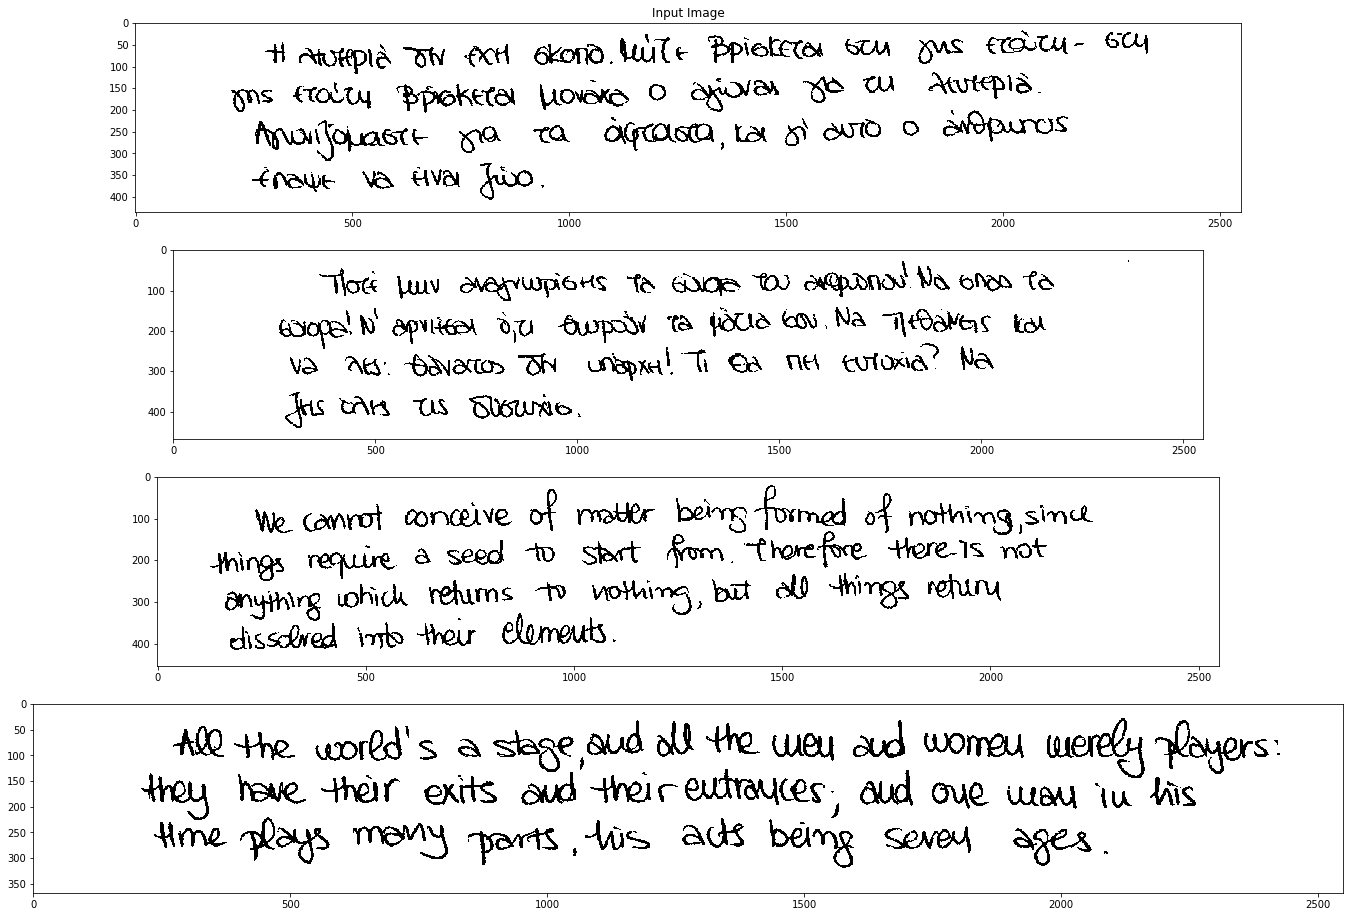

In [50]:
inpImg=mpimg.imread('../experimental_dataset_2013/124_3.tif')
outImg1=mpimg.imread('../experimental_dataset_2013/124_4.tif')
outImg2=mpimg.imread('../experimental_dataset_2013/124_2.tif')
outImg3=mpimg.imread('../experimental_dataset_2013/124_1.tif')

plt.figure(figsize=(64,16))

plt.subplot(411)
plt.title('Input Image')
plt.imshow(inpImg)

plt.subplot(412)
plt.imshow(outImg1)

plt.subplot(413)
plt.imshow(outImg2)

plt.subplot(414)
plt.imshow(outImg3)

plt.show()

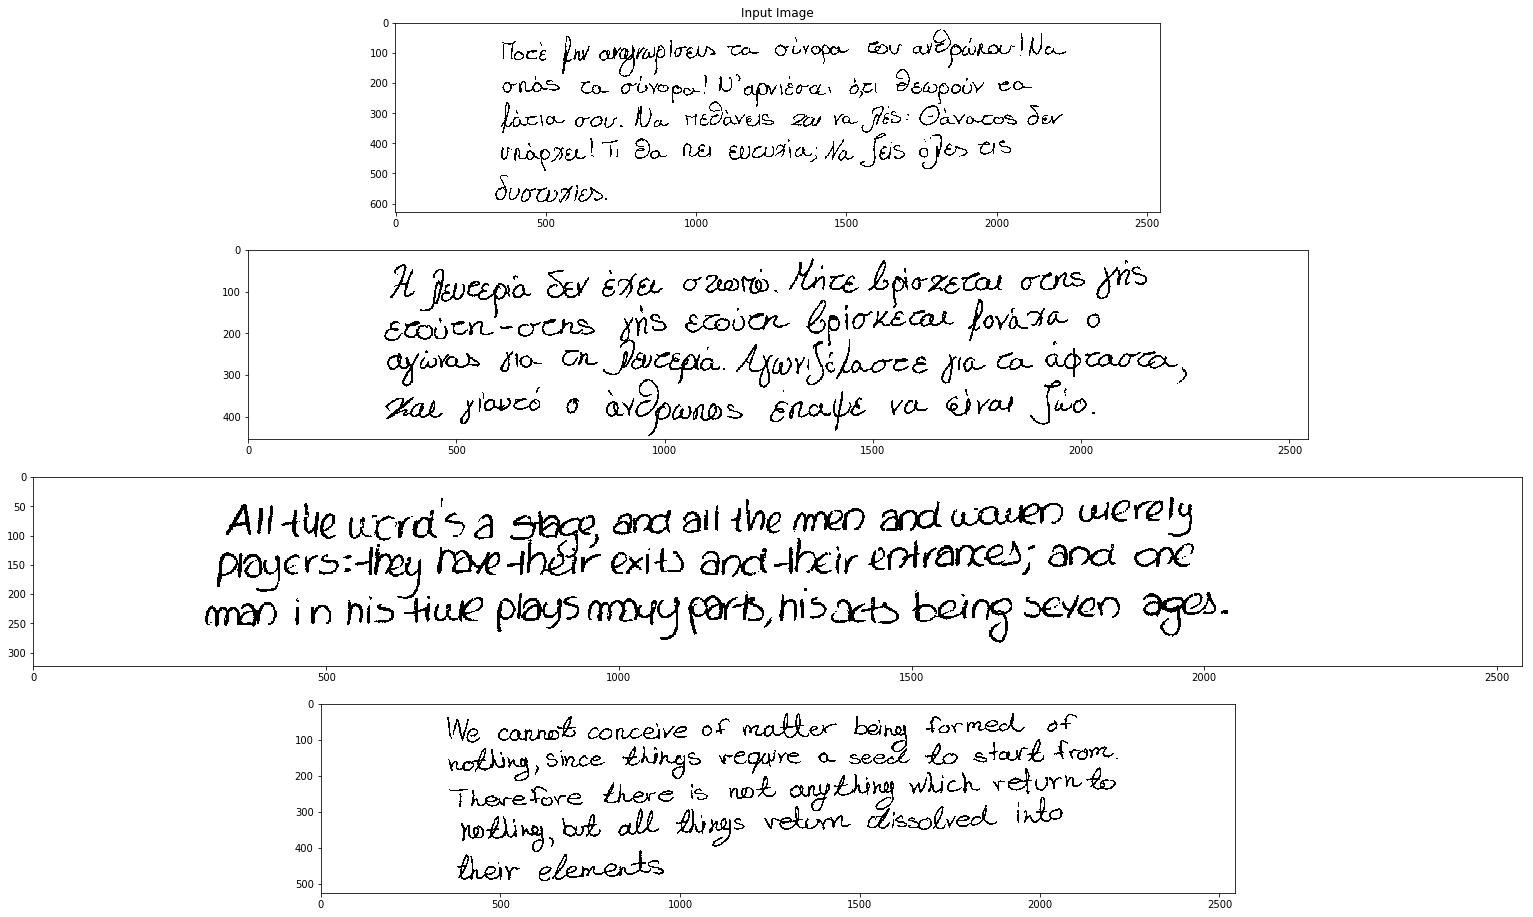

In [49]:
inpImg=mpimg.imread('../experimental_dataset_2013/077_4.tif')
outImg1=mpimg.imread('../experimental_dataset_2013/077_3.tif')
outImg2=mpimg.imread('../experimental_dataset_2013/070_1.tif')
outImg3=mpimg.imread('../experimental_dataset_2013/077_2.tif')

plt.figure(figsize=(64,16))

plt.subplot(411)
plt.title('Input Image')
plt.imshow(inpImg)

plt.subplot(412)
plt.imshow(outImg1)

plt.subplot(413)
plt.imshow(outImg2)

plt.subplot(414)
plt.imshow(outImg3)

plt.show()

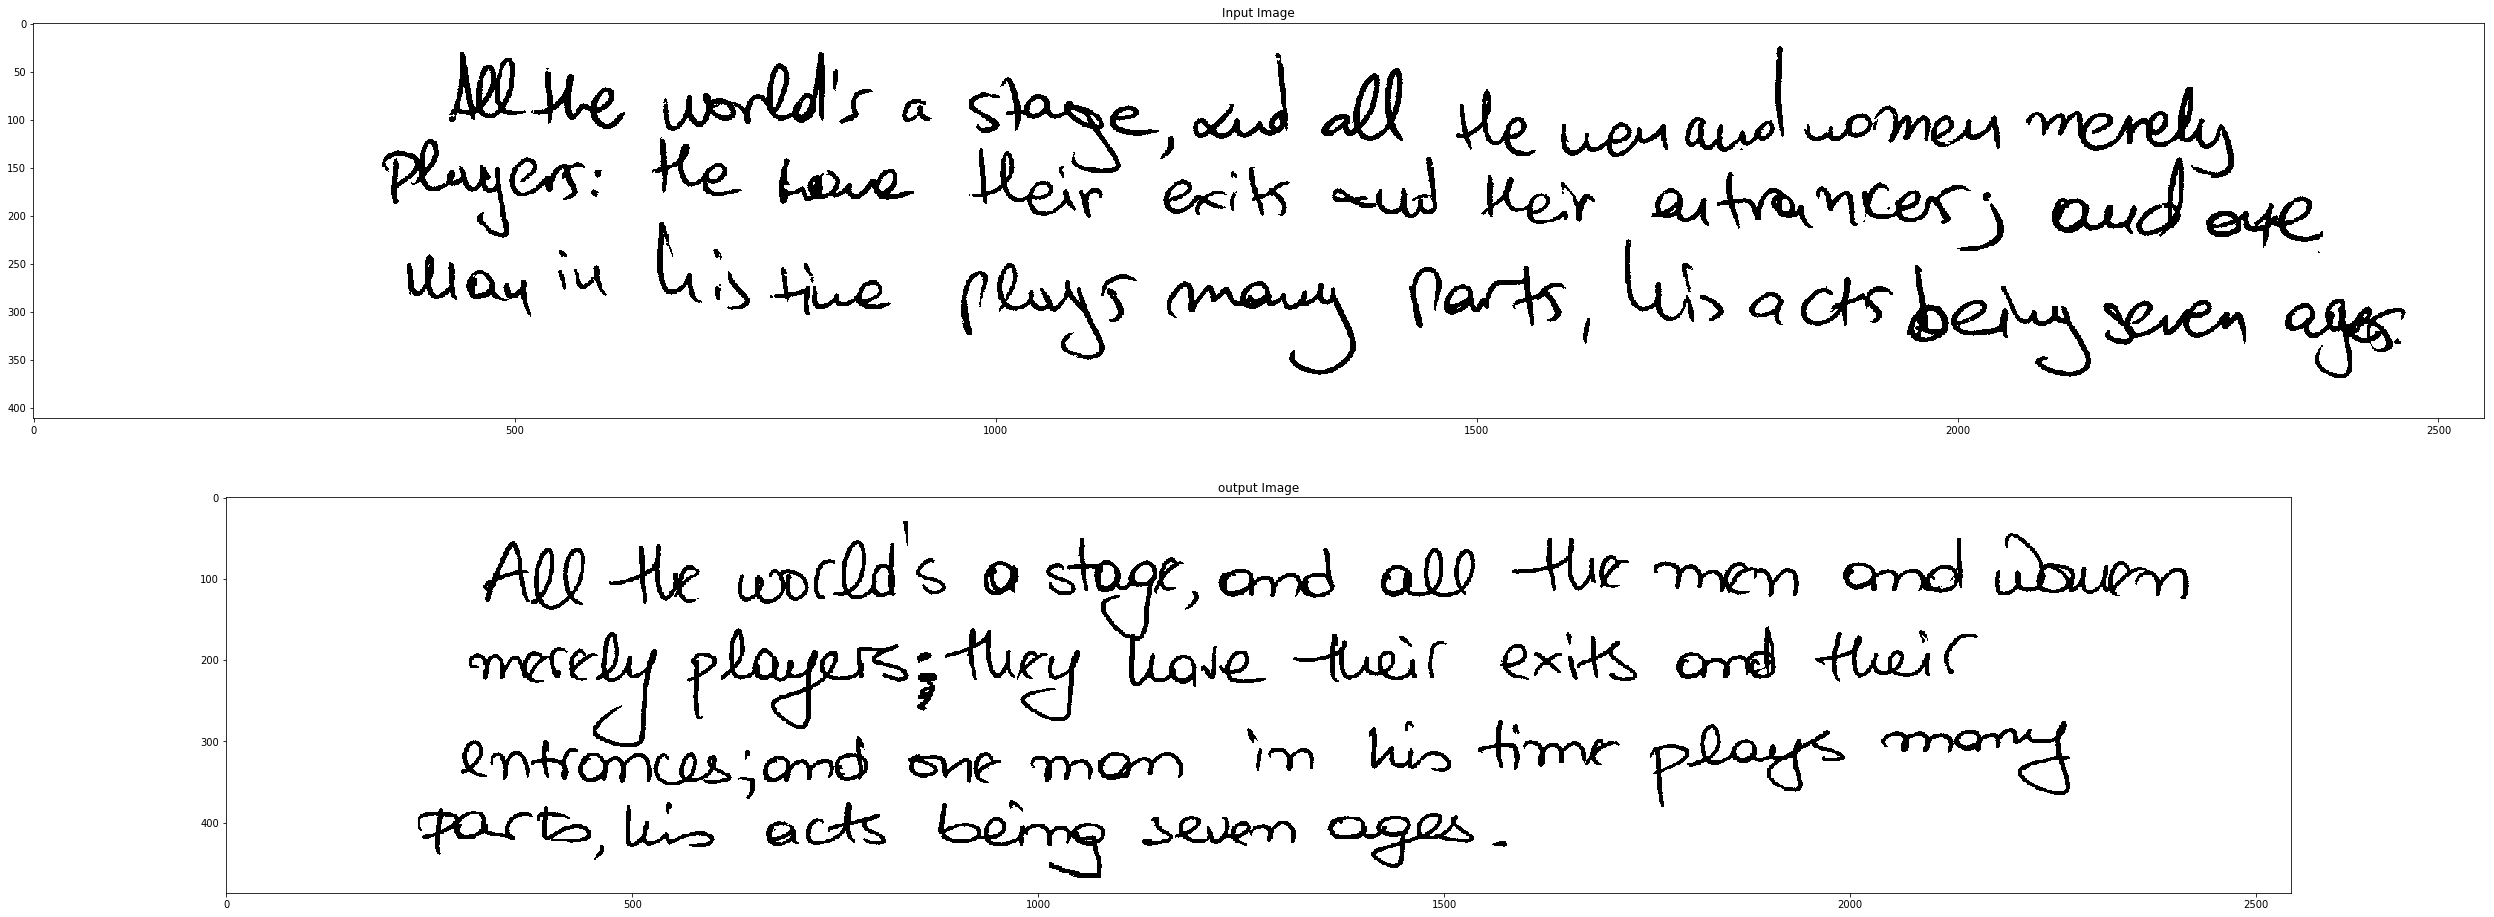

In [48]:
inpImg=mpimg.imread('../experimental_dataset_2013/034_1.tif')
outImg=mpimg.imread('../experimental_dataset_2013/057_1.tif')

plt.figure(figsize=(64,16))

plt.subplot(211)
plt.title('Input Image')
plt.imshow(inpImg)

plt.subplot(212)
plt.title('output Image')
plt.imshow(outImg)

plt.show()